In [3]:
# Package installations
!pip install tensorflow tensorflow-hub imbalanced-learn wordcloud keras-tuner

# Built-in libraries
import re
import time
import calendar

# Third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# NLP related imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine learning and deep learning imports
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# NLP initializations and resource downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.1 MB/s eta 0:00:00
Using TensorFlow backend


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Loading Data

In [4]:
# Reading Each Scrapped dataset CSV files into dataframes
df1 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/NLP COURSEWORK/Nairaland Dataset Part6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset_Part7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part9.csv')
df10 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part10b.csv')
df11 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part11.csv')
df12 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Placeholder.csv')
df13 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Placeholder2.csv')

df14 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part14.csv')
df15 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part14b.csv')
df16 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part14c.csv')
df17 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part15.csv')
df18 = pd.read_csv('/content/drive/MyDrive/Nairaland Dataset Part16.csv')

In [5]:
print("Number of elements in df1:", len(df1))
print("Number of elements in df2:", len(df2))
print("Number of elements in df3:", len(df3))
print("Number of elements in df4:", len(df4))
print("Number of elements in df5:", len(df5))
print("Number of elements in df6:", len(df6))
print("Number of elements in df7:", len(df7))
print("Number of elements in df8:", len(df8))
print("Number of elements in df9:", len(df9))
print("Number of elements in df10:", len(df10))
print("Number of elements in df11:", len(df11))
print("Number of elements in df12:", len(df12))
print("Number of elements in df13:", len(df13))
print("Number of elements in df14:", len(df14))
print("Number of elements in df15:", len(df15))
print("Number of elements in df16:", len(df16))
print("Number of elements in df17:", len(df17))
print("Number of elements in df18:", len(df18))

Number of elements in df1: 52052
Number of elements in df2: 49991
Number of elements in df3: 51871
Number of elements in df4: 53377
Number of elements in df5: 54510
Number of elements in df6: 7906
Number of elements in df7: 4221
Number of elements in df8: 6993
Number of elements in df9: 5343
Number of elements in df10: 4187
Number of elements in df11: 1564
Number of elements in df12: 6549
Number of elements in df13: 7532
Number of elements in df14: 2628
Number of elements in df15: 2570
Number of elements in df16: 2445
Number of elements in df17: 2779
Number of elements in df18: 3180


### Merging all Dataframes

In [6]:
# Merging all dataframes into a single dataframe using .concat() function
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18], ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319698 entries, 0 to 319697
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          319697 non-null  object
 1   Body           319248 non-null  object
 2   Category       319684 non-null  object
 3   Comments       293093 non-null  object
 4   Comment Count  319684 non-null  object
 5   Time Posted    319684 non-null  object
 6   Date Posted    319684 non-null  object
 7   Total Views    319684 non-null  object
 8   Url            319684 non-null  object
dtypes: object(9)
memory usage: 22.0+ MB


### Data Cleaning

### Removing Rows with Duplicate of Header

In [8]:
header_row = df.columns.values
# Finding rows in the DataFrame that match the header row
matching_rows = df[df.eq(header_row).all(axis=1)]

# Checking if any matching rows were found
if len(matching_rows) > 0:
    print('Duplicate header row(s) found:', matching_rows)
else:
    print('No duplicate header rows found')
# Dropping the matching rows
data = df.drop(matching_rows.index)

Duplicate header row(s) found:         Title  Body  Category  Comments  Comment Count  Time Posted  \
13191   Title  Body  Category  Comments  Comment Count  Time Posted   
27388   Title  Body  Category  Comments  Comment Count  Time Posted   
103149  Title  Body  Category  Comments  Comment Count  Time Posted   
103150  Title  Body  Category  Comments  Comment Count  Time Posted   
218539  Title  Body  Category  Comments  Comment Count  Time Posted   
286264  Title  Body  Category  Comments  Comment Count  Time Posted   
286265  Title  Body  Category  Comments  Comment Count  Time Posted   
292015  Title  Body  Category  Comments  Comment Count  Time Posted   
313739  Title  Body  Category  Comments  Comment Count  Time Posted   
316585  Title  Body  Category  Comments  Comment Count  Time Posted   

        Date Posted  Total Views  Url  
13191   Date Posted  Total Views  Url  
27388   Date Posted  Total Views  Url  
103149  Date Posted  Total Views  Url  
103150  Date Posted  Total 

In [9]:
### Checking for Missing Values
print(df.isnull().sum())

Title                1
Body               450
Category            14
Comments         26605
Comment Count       14
Time Posted         14
Date Posted         14
Total Views         14
Url                 14
dtype: int64


DROPPING DUPLICATE ARTICLES

In [10]:
# Keep only unique rows based on the 'Url' column
data = data.drop_duplicates(subset='Url', keep='last')
print("Number of unique articles:", len(data))

Number of unique articles: 286550


### Dropping Rows with null Values in the Title, Body & Category columns
Any row missing any of these is not useful for any meaningful analysis

In [11]:
data.dropna(subset=['Title', 'Body', 'Category'], inplace=True)
data.reset_index(drop=True, inplace=True)

Exporting Problematic Urls for re-scrapping

In [ ]:
# data_placeholder = data[data['Category'] == 'PLACEHOLDER']
# columns_of_interest = ['Url','Time Posted','Date Posted']
# data_placeholder = data_placeholder[columns_of_interest]
# #resetting the index
# data_placeholder = data_placeholder.reset_index(drop=True)
# data_placeholder.to_csv('/content/drive/MyDrive/placeholder_df5.csv')

Removing Unsuccessfully scraped News Articles set to 'Placeholder'

In [12]:
#Unsuccesfully scraped articles category was set to 'PLACEHOLDER'
data = data[data['Category'] != 'PLACEHOLDER']
#resetting the index
data = data.reset_index(drop=True)
data

,Title,Body,Category,Comments,Comment Count,Time Posted,Date Posted,Total Views,Url
0,PDP G-5 Govs Return To Rivers After UK Meeting,"The G-5 governors, popularly known as the ‘Int...",Politics,https://leadership.ng/pdp-g-5-govs-return-to-r...,105.0,10:39am,"Dec 31, 2022",19958.0,https://www.nairaland.com/7503295/pdp-g-5-govs...
1,Suspected Bandits Kill Young Man Weeks After C...,Suspected bandits have killed a young man who ...,Crime,Suspected bandits have killed a young man who ...,47.0,10:38am,"Dec 31, 2022",14780.0,https://www.nairaland.com/7503173/suspected-ba...
2,"9ice And His Wife, Sunkanmi Celebrates 3rd Wed...","Nigerian singer, Abolore Akande, popularly kno...",Celebrities,"Nigerian singer, Abolore Akande, popularly kno...",82.0,10:38am,"Dec 31, 2022",26746.0,https://www.nairaland.com/7503347/9ice-wife-su...
3,Onslaught Launched Against Killer-herdsmen In ...,•Amotekun combs Ondo forests •Ogun buys drones...,Politics,•Amotekun combs Ondo forests •Ogun buys drones...,116.0,10:35am,"Dec 31, 2022",19400.0,https://www.nairaland.com/7503670/onslaught-la...
4,Man Beat Daughter To Death For Using His Phone...,The Akwa Ibom State Police Command on Friday p...,Crime,"DAILY POST;;;The man went too far, there are d...",145.0,10:01am,"Dec 31, 2022",51314.0,https://www.nairaland.com/7503259/man-beat-dau...
...,...,...,...,...,...,...,...,...,...
283117,Is El-rufai Behind The Zaria Church Bombing?,I just got this bb message and thought i shoul...,Politics,I just got this bb message and thought i shoul...,151,6:49pm,"Jun 19, 2012",18866,https://www.nairaland.com/968592/el-rufai-behi...
283118,Many Married Men Are Unhappy...,It has been scientifically proven that many me...,Family,It has been scientifically proven that many me...,406,4:20pm,"Jun 08, 2012",44806,https://www.nairaland.com/958447/many-married-...
283119,Are Fake Designer Wears And Accessories Fashio...,Is Fake Fashion OK?I had a friend come visit i...,Fashion,Is Fake Fashion OK?I had a friend come visit i...,29,3:44pm,"May 31, 2012",5400,https://www.nairaland.com/913869/fake-designer...
283120,What Happened To TB Joshua's Champions League ...,Initially reports had it that T.B Joshua predi...,Sports,Initially reports had it that T.B Joshua predi...,109,11:46am,"May 20, 2012",30082,https://www.nairaland.com/942138/erm-what-happ...


More Data Cleaning

In [13]:
# Fill missing values in 'Comment Count' and 'Total Views' columns with 0
data['Comment Count'] = data['Comment Count'].fillna(0)
data['Total Views'] = data['Total Views'].fillna(0)

# Convert 'Comment Count' and 'Total Views' columns to numeric (float) data type
data['Comment Count'] = pd.to_numeric(data['Comment Count'], errors='coerce')
data['Total Views'] = pd.to_numeric(data['Total Views'], errors='coerce')

# Fill any missing values (NaN) generated by the 'pd.to_numeric()' function with 0
data['Comment Count'] = data['Comment Count'].fillna(0)
data['Total Views'] = data['Total Views'].fillna(0)

# Convert 'Comment Count' and 'Total Views' columns to integer data type
data['Comment Count'] = data['Comment Count'].astype(int)
data['Total Views'] = data['Total Views'].astype(int)


### Checking for (and fixing) Invalid entries in 'Date Posted' column

In [14]:
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, errors='raise')
        return True
    except:
        return False

# Create a boolean mask for invalid dates
invalid_dates_mask = ~data['Date Posted'].apply(is_valid_date)

# Extract the problematic entries
problematic_entries = data[invalid_dates_mask]

print(f"Number of problematic date entries: {len(problematic_entries)}")
if len(problematic_entries) < 20:  # Only display the problematic entries if there are a few of them
    print("\nProblematic entries:")
    print(problematic_entries['Date Posted'])


Number of problematic date entries: 33


### Converting all entries in 'Date Posted' to a uniform Format e.g May 5, 2023

In [15]:
# Convert 'Date Posted' to datetime format and extract month
data['Date Posted'] = pd.to_datetime(data['Date Posted'], errors='coerce')

# Replacing invalid dates with 'NaT'
data['Date Posted'].fillna(pd.NaT, inplace=True)

# Convert the datetime objects back to strings in the desired format
data['Date Posted'] = data['Date Posted'].dt.strftime('%b %d, %Y')

In [16]:
data

,Title,Body,Category,Comments,Comment Count,Time Posted,Date Posted,Total Views,Url
0,PDP G-5 Govs Return To Rivers After UK Meeting,"The G-5 governors, popularly known as the ‘Int...",Politics,https://leadership.ng/pdp-g-5-govs-return-to-r...,105,10:39am,"Dec 31, 2022",19958,https://www.nairaland.com/7503295/pdp-g-5-govs...
1,Suspected Bandits Kill Young Man Weeks After C...,Suspected bandits have killed a young man who ...,Crime,Suspected bandits have killed a young man who ...,47,10:38am,"Dec 31, 2022",14780,https://www.nairaland.com/7503173/suspected-ba...
2,"9ice And His Wife, Sunkanmi Celebrates 3rd Wed...","Nigerian singer, Abolore Akande, popularly kno...",Celebrities,"Nigerian singer, Abolore Akande, popularly kno...",82,10:38am,"Dec 31, 2022",26746,https://www.nairaland.com/7503347/9ice-wife-su...
3,Onslaught Launched Against Killer-herdsmen In ...,•Amotekun combs Ondo forests •Ogun buys drones...,Politics,•Amotekun combs Ondo forests •Ogun buys drones...,116,10:35am,"Dec 31, 2022",19400,https://www.nairaland.com/7503670/onslaught-la...
4,Man Beat Daughter To Death For Using His Phone...,The Akwa Ibom State Police Command on Friday p...,Crime,"DAILY POST;;;The man went too far, there are d...",145,10:01am,"Dec 31, 2022",51314,https://www.nairaland.com/7503259/man-beat-dau...
...,...,...,...,...,...,...,...,...,...
283117,Is El-rufai Behind The Zaria Church Bombing?,I just got this bb message and thought i shoul...,Politics,I just got this bb message and thought i shoul...,151,6:49pm,"Jun 19, 2012",18866,https://www.nairaland.com/968592/el-rufai-behi...
283118,Many Married Men Are Unhappy...,It has been scientifically proven that many me...,Family,It has been scientifically proven that many me...,406,4:20pm,"Jun 08, 2012",44806,https://www.nairaland.com/958447/many-married-...
283119,Are Fake Designer Wears And Accessories Fashio...,Is Fake Fashion OK?I had a friend come visit i...,Fashion,Is Fake Fashion OK?I had a friend come visit i...,29,3:44pm,"May 31, 2012",5400,https://www.nairaland.com/913869/fake-designer...
283120,What Happened To TB Joshua's Champions League ...,Initially reports had it that T.B Joshua predi...,Sports,Initially reports had it that T.B Joshua predi...,109,11:46am,"May 20, 2012",30082,https://www.nairaland.com/942138/erm-what-happ...


### Removing the first comment from all Articles
which happens to be a repeat of the post or the source url

In [17]:
# Applying the custom function to remove the first comment from the 'Comments' column
def remove_first_comment(comment_str):
    if isinstance(comment_str, str):
        comments = comment_str.split(';;;')
        if len(comments) > 1:
            return ';;;'.join(comments[1:])
        else:
            return ''
    else:
        return comment_str

data['Comments'] = data['Comments'].apply(remove_first_comment)


### Adding a Feature 'Source Url'
Extracted from the News Article Body

In [18]:
# Extract URLs from 'Body' column
data['Source Url'] = data['Body'].apply(lambda x: re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

# Convert the lists to comma-separated strings
data['Source Url'] = data['Source Url'].apply(lambda x: ', '.join(x))

# Replace empty strings with NaN in 'Extracted_URLs' column
data['Source Url'].replace('', np.nan, inplace=True)
data

,Title,Body,Category,Comments,Comment Count,Time Posted,Date Posted,Total Views,Url,Source Url
0,PDP G-5 Govs Return To Rivers After UK Meeting,"The G-5 governors, popularly known as the ‘Int...",Politics,They keep wasting tax payers money flying up a...,105,10:39am,"Dec 31, 2022",19958,https://www.nairaland.com/7503295/pdp-g-5-govs...,https://leadership.ng/pdp-g-5-govs-return-to-r...
1,Suspected Bandits Kill Young Man Weeks After C...,Suspected bandits have killed a young man who ...,Crime,Cc: Lalasticlala Nlfpmod Mynd44 And Seun;;;See...,47,10:38am,"Dec 31, 2022",14780,https://www.nairaland.com/7503173/suspected-ba...,NaN
2,"9ice And His Wife, Sunkanmi Celebrates 3rd Wed...","Nigerian singer, Abolore Akande, popularly kno...",Celebrities,Ever since he was caught wankeen and pressing ...,82,10:38am,"Dec 31, 2022",26746,https://www.nairaland.com/7503347/9ice-wife-su...,https://www.instagram.com/p/CmyieHvoAmh/?utm_s...
3,Onslaught Launched Against Killer-herdsmen In ...,•Amotekun combs Ondo forests •Ogun buys drones...,Politics,You can't be killing people for their God give...,116,10:35am,"Dec 31, 2022",19400,https://www.nairaland.com/7503670/onslaught-la...,https://tribuneonlineng.com/onslaught-launched...
4,Man Beat Daughter To Death For Using His Phone...,The Akwa Ibom State Police Command on Friday p...,Crime,"The man went too far, there are dozens of ways...",145,10:01am,"Dec 31, 2022",51314,https://www.nairaland.com/7503259/man-beat-dau...,NaN
...,...,...,...,...,...,...,...,...,...,...
283117,Is El-rufai Behind The Zaria Church Bombing?,I just got this bb message and thought i shoul...,Politics,^^my friend hush. . .what agenda r u talking a...,151,6:49pm,"Jun 19, 2012",18866,https://www.nairaland.com/968592/el-rufai-behi...,NaN
283118,Many Married Men Are Unhappy...,It has been scientifically proven that many me...,Family,"Nice piece, like we all know the truth is alwa...",406,4:20pm,"Jun 08, 2012",44806,https://www.nairaland.com/958447/many-married-...,NaN
283119,Are Fake Designer Wears And Accessories Fashio...,Is Fake Fashion OK?I had a friend come visit i...,Fashion,"Fake it till you make it, what happens if you ...",29,3:44pm,"May 31, 2012",5400,https://www.nairaland.com/913869/fake-designer...,NaN
283120,What Happened To TB Joshua's Champions League ...,Initially reports had it that T.B Joshua predi...,Sports,God reveals so that we canattend to it...........,109,11:46am,"May 20, 2012",30082,https://www.nairaland.com/942138/erm-what-happ...,NaN


### Overview of all Categories

In [19]:
category_distribution = data['Category'].value_counts()

# Convert the Series to a list of tuples
category_distribution_list = list(category_distribution.items())

# Print each element in the list
for category, count in category_distribution_list:
    print(f"{category}: {count}")


Politics: 97125
Celebrities: 38638
Crime: 21495
Romance: 12378
Sports: 11522
Education: 9757
Religion: 9042
Travel: 7618
Business: 7454
Family: 7319
Health: 6390
Jobs/Vacancies: 5001
Phones: 4222
Car Talk: 3876
Career: 3802
Foreign Affairs: 3357
TV/Movies: 3330
European Football (EPL, UEFA, La Liga): 2851
Nairaland / General: 2830
Culture: 2338
Music/Radio: 2229
Islam for Muslims: 2151
Fashion: 1965
Properties: 1892
Food: 1883
Literature: 1588
Webmasters: 1586
NYSC: 1461
Events: 1326
Science/Technology: 1066
Jokes Etc: 873
Agriculture: 712
Investment: 604
Computers: 531
Art, Graphics & Video: 436
Pets: 390
Programming: 305
Autos: 300
Forum Games: 255
Gaming: 245
Entertainment: 162
Poems For Review: 87
Technology Market: 68
European Football (EPL, UEFA, La Liga) (2): 62
Dating And Meet-up Zone: 54
Adverts: 50
Sports (2): 34
Satellite TV Technology: 30
European Football (EPL, UEFA, La Liga) (3): 25
European Football (EPL, UEFA, La Liga) (4): 21
Phone/Internet Market: 19
- Politics: 17
Mu

### Sanitizing the Category names

In [20]:
def clean_category_name(category):
    if not isinstance(category, str):
        return category
    cleaned_name = re.sub(r'\s\(\d+\)', '', category)
    cleaned_name = re.sub(r'^- ', '', cleaned_name)  # Remove hyphen before the category name
    if cleaned_name == 'Nairaland / General':
        cleaned_name = 'General'
    return cleaned_name
data['Category'] = data['Category'].apply(clean_category_name)

### Function to save articles from each category to disk for later use

In [ ]:
# import string

# def sanitize_category_name(category_name):
#     # Remove leading and trailing spaces
#     cleaned_name = category_name.strip()

#     # Replace spaces with underscores
#     cleaned_name = cleaned_name.replace(" ", "_")

#     # Replace special characters (excluding underscores) with empty string
#     cleaned_name = ''.join(ch if ch in string.ascii_letters or ch in string.digits or ch == '_' else '' for ch in cleaned_name)

#     return cleaned_name

# # Loop through each unique category again
# for category in data['Category'].unique():
#     sanitized_category = sanitize_category_name(category)

#     # Filter rows for the current category
#     filtered_data = data[data['Category'] == category]

#     # Define the save path using sanitized category name
#     save_path = f'/content/drive/MyDrive/OCT2023 NAIRALAND/{sanitized_category}.csv'

#     # Save the filtered data to CSV
#     try:
#         filtered_data.to_csv(save_path, index=False)
#         print(f"Saved {category} data to {save_path}")
#     except Exception as e:
#         print(f"Error saving {category}: {e}")



Saved Politics data to /content/drive/MyDrive/OCT2023 NAIRALAND/Politics.csv
Saved Crime data to /content/drive/MyDrive/OCT2023 NAIRALAND/Crime.csv
Saved Celebrities data to /content/drive/MyDrive/OCT2023 NAIRALAND/Celebrities.csv
Saved Food data to /content/drive/MyDrive/OCT2023 NAIRALAND/Food.csv
Saved Religion data to /content/drive/MyDrive/OCT2023 NAIRALAND/Religion.csv
Saved European Football (EPL, UEFA, La Liga) data to /content/drive/MyDrive/OCT2023 NAIRALAND/European_Football_EPL_UEFA_La_Liga.csv
Saved Sports data to /content/drive/MyDrive/OCT2023 NAIRALAND/Sports.csv
Saved Romance data to /content/drive/MyDrive/OCT2023 NAIRALAND/Romance.csv
Saved Business data to /content/drive/MyDrive/OCT2023 NAIRALAND/Business.csv
Saved Health data to /content/drive/MyDrive/OCT2023 NAIRALAND/Health.csv
Saved General data to /content/drive/MyDrive/OCT2023 NAIRALAND/General.csv
Saved Jobs/Vacancies data to /content/drive/MyDrive/OCT2023 NAIRALAND/JobsVacancies.csv
Saved Phones data to /content

### EXPLORATORY DATA ANALYSIS

POST COUNT

In [21]:
len(data)
print(f'There are a total of {len(data)} news articles on Nairaland front page')

There are a total of 283122 news articles on Nairaland front page


CATEGORY COUNT

In [22]:
distinct_categories_count = data['Category'].nunique()
print(f'There are {distinct_categories_count} distinct categories of News/Articles on the Frontpage')


There are 61 distinct categories of News/Articles on the Frontpage


CATEGORY DISTRIBUTION

In [23]:
category_distribution = data['Category'].value_counts()

# Convert the Series to a list of tuples
category_distribution_list = list(category_distribution.items())

# Print each element in the list
for category, count in category_distribution_list:
    print(f"{category}: {count}")


Politics: 97183
Celebrities: 38645
Crime: 21497
Romance: 12387
Sports: 11636
Education: 9761
Religion: 9046
Travel: 7621
Business: 7459
Family: 7327
Health: 6392
Jobs/Vacancies: 5005
Phones: 4225
Car Talk: 3876
Career: 3809
Foreign Affairs: 3358
TV/Movies: 3358
European Football (EPL, UEFA, La Liga): 3001
General: 2836
Culture: 2340
Music/Radio: 2233
Islam for Muslims: 2154
Fashion: 1968
Properties: 1892
Food: 1883
Literature: 1590
Webmasters: 1586
NYSC: 1461
Events: 1327
Science/Technology: 1066
Jokes Etc: 874
Agriculture: 712
Investment: 613
Computers: 531
Art, Graphics & Video: 438
Pets: 390
Programming: 306
Autos: 300
Forum Games: 255
Gaming: 245
Entertainment: 162
Poems For Review: 87
Technology Market: 68
Dating And Meet-up Zone: 55
Adverts: 50
Satellite TV Technology: 30
Phone/Internet Market: 19
Music Business: 13
Rap Battles: 13
Fashion/Clothing Market: 7
Software/Programmer Market: 6
Business To Business: 5
Certification And Training Adverts: 4
Educational Services: 3
Travel 

TOP 10 CATEGORY (According to number of Published News Article)

Politics       97,183 Articles
Celebrities    38,645 Articles
Crime          21,497 Articles
Romance        12,387 Articles
Sports         11,636 Articles
Education       9,761 Articles
Religion        9,046 Articles
Travel          7,621 Articles
Business        7,459 Articles
Family          7,327 Articles
Name: Category, dtype: object


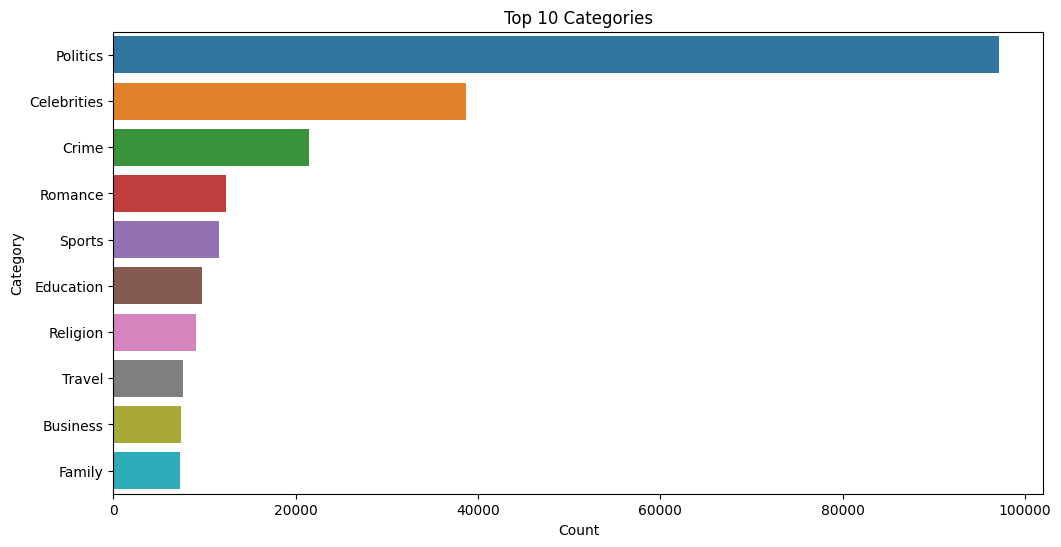

In [24]:
top_10_num_articles = data['Category'].value_counts().head(10)
# Format and print the values
formatted_values = top_10_num_articles.round().apply(lambda x: "{:,.0f} Articles".format(x))
print(formatted_values)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_num_articles.values, y=top_10_num_articles.index)
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

BOTTOM 10 CATEGORY(According to number of Published News Article)

Business To Business                  5 Articles
Certification And Training Adverts    4 Articles
Educational Services                  3 Articles
Travel Ads                            3 Articles
Nairaland Ads                         3 Articles
Graphics/Video Market                 2 Articles
Computer Market                       2 Articles
Web Market                            2 Articles
Top Pages                             1 Articles
Literature/Writing Ads                1 Articles
Name: Category, dtype: object


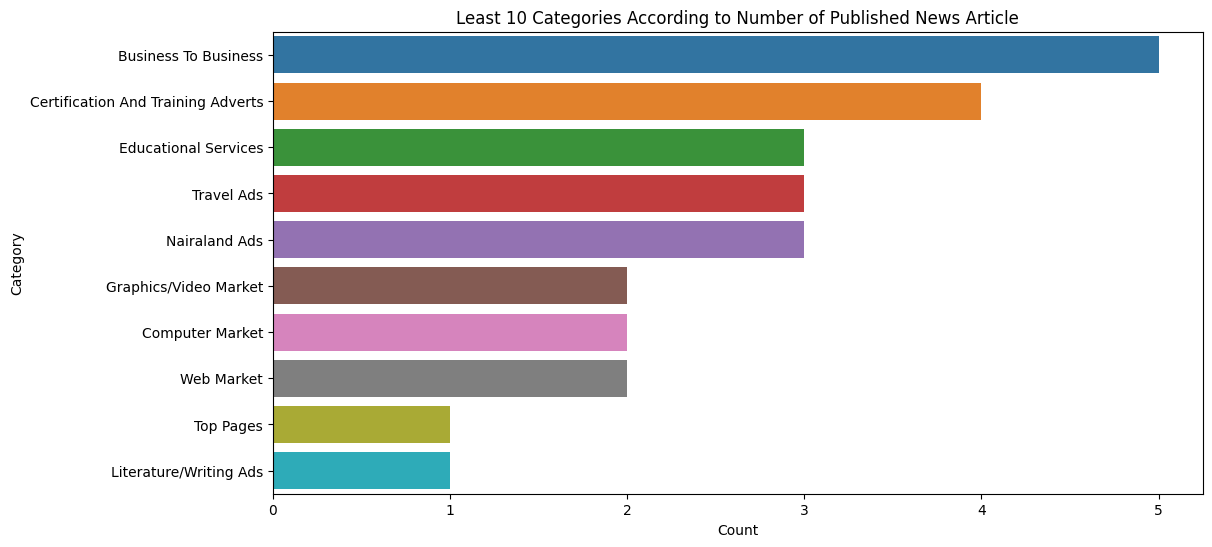

In [25]:
# For least 10 categories
bottom_10_num_articles = data['Category'].value_counts().tail(10)

formatted_values = bottom_10_num_articles.round().apply(lambda x: "{:,.0f} Articles".format(x))
print(formatted_values)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_10_num_articles.values, y=bottom_10_num_articles.index)
plt.title('Least 10 Categories According to Number of Published News Article')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


### VIEWS ANALYSIS

Total Number of Views

In [26]:
total_views = data['Total Views'].sum()

# Format the total views with commas
formatted_total_views = "{:,.0f}".format(total_views)

print("Total views of all the news articles on frontpage:", formatted_total_views)

Total views of all the news articles on frontpage: 9,244,902,581


TOP 10 CATEGORIES (According to Total Views Garnered)

Category
Politics       2,540,286,034 Views
Celebrities    1,525,228,267 Views
Crime            780,787,210 Views
Romance          543,552,872 Views
Sports           360,819,357 Views
Education        309,816,039 Views
Religion         298,732,706 Views
Travel           273,632,053 Views
Family           258,455,738 Views
Health           240,498,995 Views
Name: Total Views, dtype: object


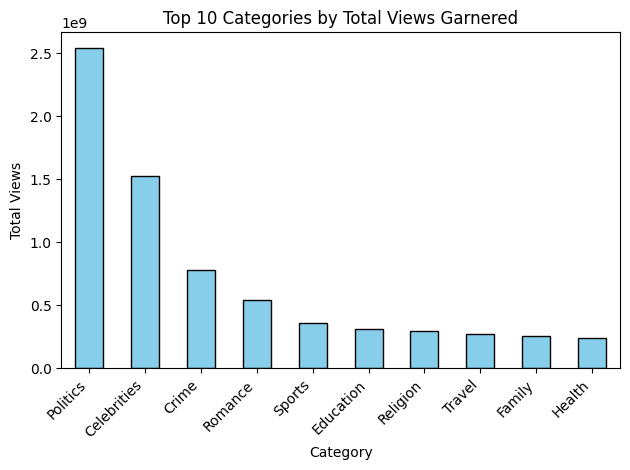

In [27]:
top_cat_views = data.groupby('Category')['Total Views'].sum().sort_values(ascending=False).head(10)
# Format and print the values
formatted_values = top_cat_views.round().apply(lambda x: "{:,.0f} Views".format(x))
print(formatted_values)

# Plotting
top_cat_views.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Categories by Total Views Garnered')
plt.ylabel('Total Views')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.tight_layout()
plt.show()


BOTTOM 10 CATEGORIES (According to the total views garnered)

Category
Fashion/Clothing Market               245,068 Views
Rap Battles                           234,308 Views
Educational Services                  211,273 Views
Software/Programmer Market             39,756 Views
Certification And Training Adverts     34,478 Views
Top Pages                              17,041 Views
Computer Market                        13,516 Views
Web Market                             11,891 Views
Graphics/Video Market                  10,255 Views
Literature/Writing Ads                      0 Views
Name: Total Views, dtype: object


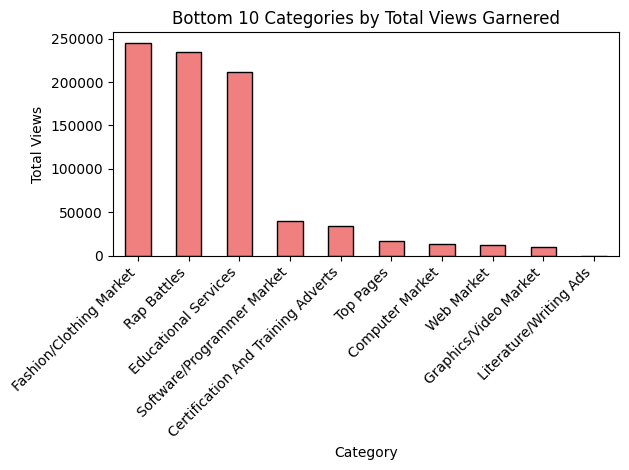

In [28]:
bottom_cat_views = data.groupby('Category')['Total Views'].sum().sort_values(ascending=False).tail(10)
# Format and print the values
formatted_values = bottom_cat_views.round().apply(lambda x: "{:,.0f} Views".format(x))
print(formatted_values)
# Plotting
bottom_cat_views.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Bottom 10 Categories by Total Views Garnered')
plt.ylabel('Total Views')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.tight_layout()
plt.show()


TOP 10 CATEGORY (According to the highest average views)



Category
Adverts                    2,015,243 Views Per frontpage post
Satellite TV Technology      292,494 Views Per frontpage post
Nairaland Ads                113,913 Views Per frontpage post
Travel Ads                    97,794 Views Per frontpage post
Business To Business          94,325 Views Per frontpage post
Educational Services          70,424 Views Per frontpage post
Investment                    61,920 Views Per frontpage post
Technology Market             55,867 Views Per frontpage post
TV/Movies                     55,151 Views Per frontpage post
Literature                    50,677 Views Per frontpage post
Name: Total Views, dtype: object


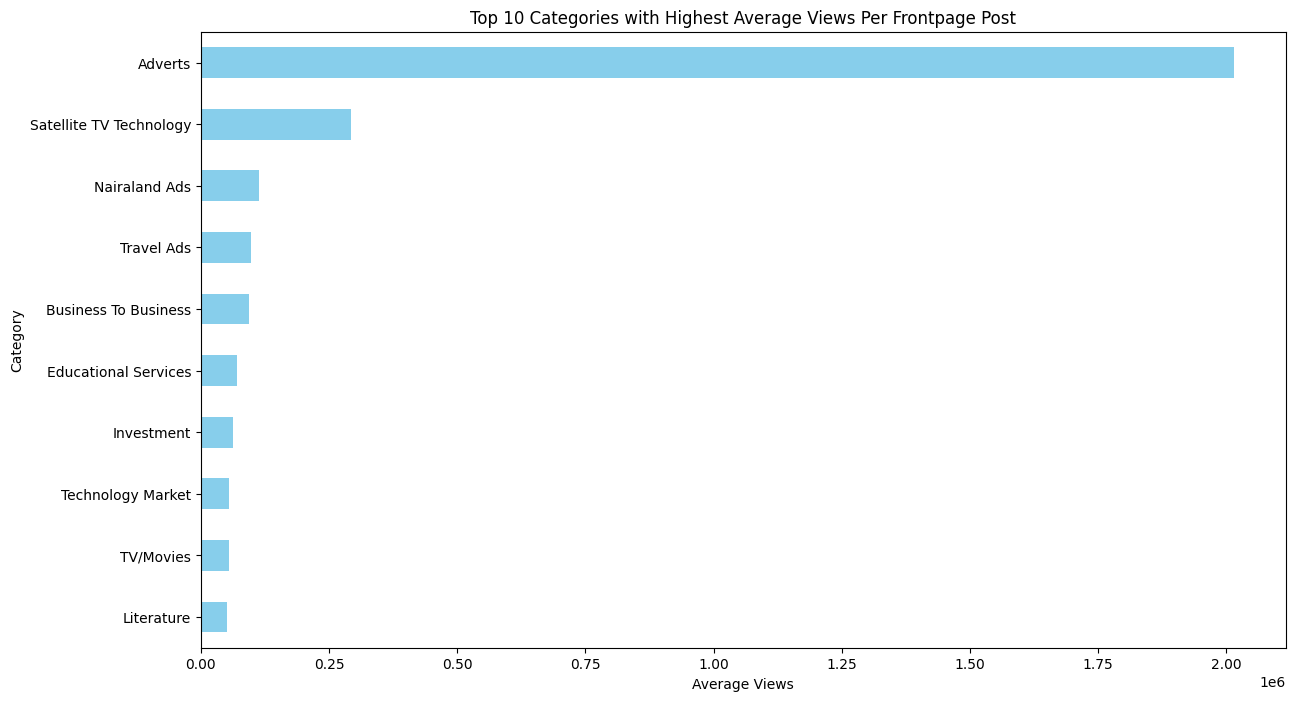

In [29]:
# Top 10 categories with highest average views per post
top_cat_average_views = data.groupby('Category')['Total Views'].mean().nlargest(10)

# Format and print the values
formatted_values = top_cat_average_views.round().apply(lambda x: "{:,.0f} Views Per frontpage post".format(x))
print(formatted_values)
# Display the chart
plt.figure(figsize=(14, 8))
top_cat_average_views.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Categories with Highest Average Views Per Frontpage Post')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.show()


BOTTOM 10 CATEGORY (According to the highest average views per post)

Average Lowest Views Per Category
Category
Programming                           16,475 Views per Frontpage Post
Islam for Muslims                     15,355 Views per Frontpage Post
Webmasters                            11,605 Views per Frontpage Post
Certification And Training Adverts     8,620 Views per Frontpage Post
Poems For Review                       8,588 Views per Frontpage Post
Computer Market                        6,758 Views per Frontpage Post
Software/Programmer Market             6,626 Views per Frontpage Post
Web Market                             5,946 Views per Frontpage Post
Graphics/Video Market                  5,128 Views per Frontpage Post
Literature/Writing Ads                     0 Views per Frontpage Post
Name: Total Views, dtype: object


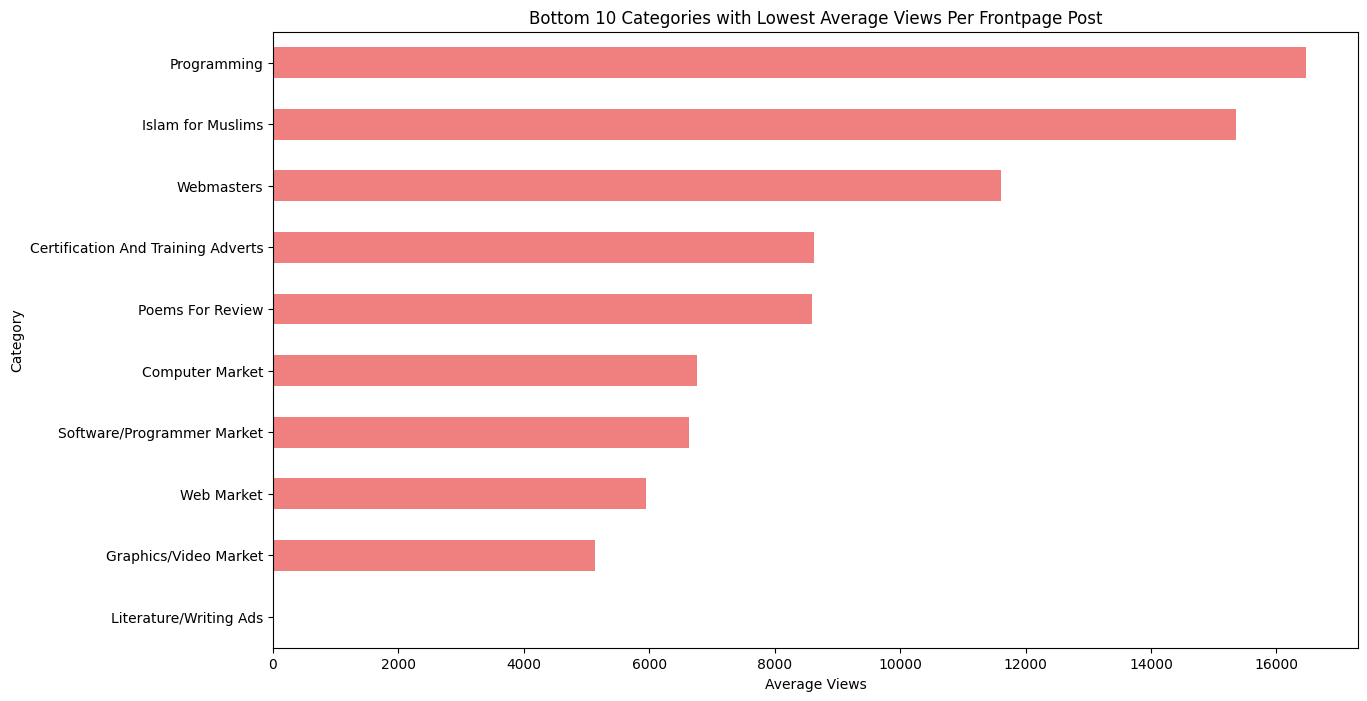

In [30]:
# Bottom 10 categories with lowest average views
bottom_cat_average_views = data.groupby('Category')['Total Views'].mean().nsmallest(10)

# Format and print the values in descending order
formatted_values = bottom_cat_average_views.sort_values(ascending=False).round().apply(lambda x: "{:,.0f} Views per Frontpage Post".format(x))
print('Average Lowest Views Per Category')
print(formatted_values)

# Display the chart in descending order
plt.figure(figsize=(14, 8))
bottom_cat_average_views.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Bottom 10 Categories with Lowest Average Views Per Frontpage Post')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.show()


DESCRIPTIVE STATISTICS OF POST VIEWS

In [31]:
# Setting the float display format to non-scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Basic statistics for 'Total Views'
print(data['Total Views'].describe())

# Resetting the float display format to its default for future analyses
pd.reset_option('display.float_format')

count     283122.00
mean       32653.42
std       111693.01
min            0.00
25%        15856.25
50%        27178.00
75%        41725.00
max     26157898.00
Name: Total Views, dtype: float64


Distribution of Views Using a Boxplot

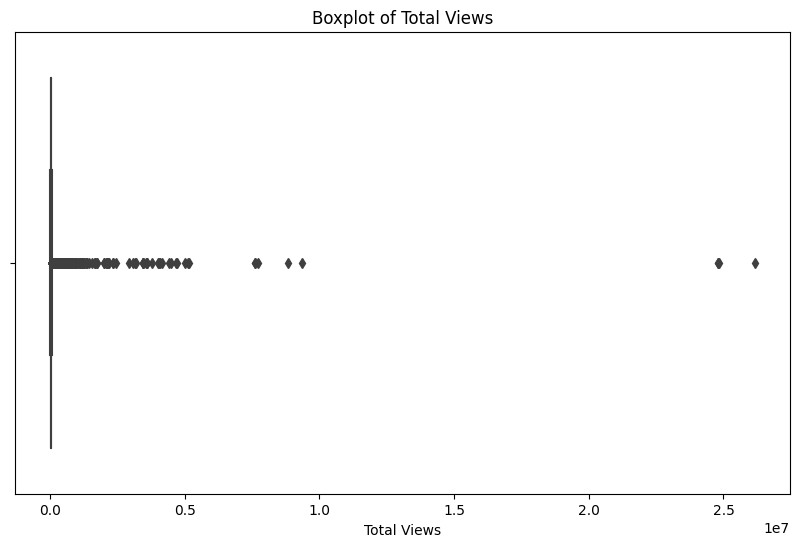

In [32]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Total Views'])
plt.title('Boxplot of Total Views')
plt.show()

Article with highest Views: Category by Category

In [33]:
# Convert 'Comment Count' to numeric (integer) data type
data['Total Views'] = pd.to_numeric(data['Total Views'], errors='coerce').fillna(0).astype(int)

# Group by category, then sort and take top for each category
top_views_per_category = (data.groupby('Category', group_keys=False)
                      .apply(lambda group: group.sort_values(by='Total Views', ascending=False).head(1)))

# Increase the number of characters displayed in the title column
pd.set_option('display.max_colwidth', 100)  # Adjust 100 to desired number of characters

# Rename columns for display
display_cols = ['Category', 'Title', 'Total Views', 'Comment Count', 'Date Posted']
rename_dict = {
    'Title': 'Post Title',
    'Total Views': 'Views'
}

# Print the top titles without the index, with renamed column headers
print(top_views_per_category[display_cols].rename(columns=rename_dict).to_string(index=False))

# Reset the display option back to its default for future analyses
pd.reset_option('display.max_colwidth')


                              Category                                                                       Post Title    Views  Comment Count  Date Posted
                               Adverts                                           How To Place Targeted Ads On Nairaland 26157898              4 Apr 17, 2013
                           Agriculture                                                 Starting A Poultry Farm (a Blog)   928263           8687 Mar 17, 2012
                 Art, Graphics & Video                                      Let's Draw! A Hand (Lessons on how to draw)   221582            652 Nov 08, 2013
                                 Autos                                      Total Cost Of Clearing A Vehicle In Nigeria   736353             32 Oct 17, 2011
                              Business              If You Are Uber Partner In Lagos, Please Share Your Experience Here  4044723            725 Mar 27, 2018
                  Business To Business                    

DISCRIPTIVE STATISTICS OF VIEWS FOR EACH CATEGORY

In [34]:
# Using the agg function to apply multiple aggregations
views_stats_df = data.groupby('Category')['Total Views'].agg(
    No_of_Posts='size',
    Mean='mean',
    Median='median',
    Max='max',
    Min='min',
    SD='std'
).sort_values(by='Mean', ascending=False)

# Round the results for better readability (excluding the Posts column)
views_stats_df.loc[:, 'Mean':] = views_stats_df.loc[:, 'Mean':].round()

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the stats DataFrame
print(views_stats_df)

# Reset the display option back to its default for future analyses
pd.reset_option('display.max_rows')


                                        No_of_Posts       Mean   Median  \
Category                                                                  
Adverts                                          50  2015243.0   1511.0   
Satellite TV Technology                          30   292494.0  22289.0   
Nairaland Ads                                     3   113913.0  89317.0   
Travel Ads                                        3    97794.0  51814.0   
Business To Business                              5    94325.0   2711.0   
Educational Services                              3    70424.0  62405.0   
Investment                                      613    61920.0  22913.0   
Technology Market                                68    55867.0  16736.0   
TV/Movies                                      3358    55151.0  31383.0   
Literature                                     1590    50677.0  18652.0   
Jokes Etc                                       874    46595.0  44878.0   
Pets                     

TRENDS OF AVERAGE VIEWS OVER THE YEARS

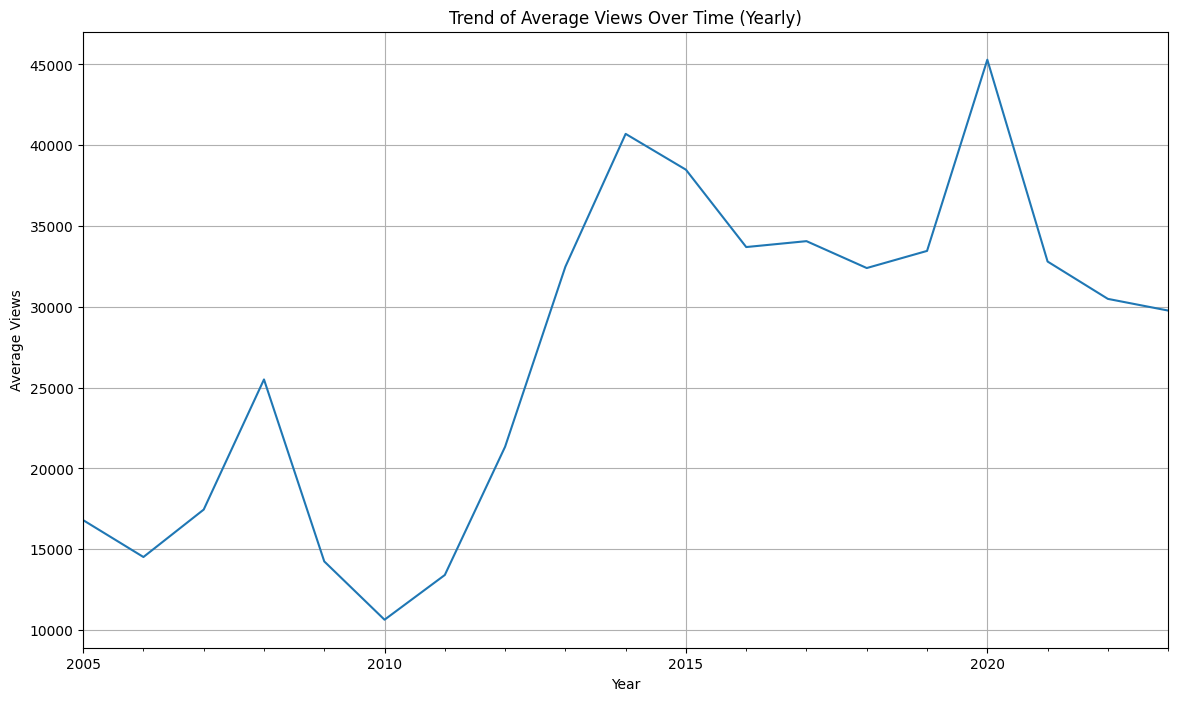

In [35]:
data['Date Posted'] = pd.to_datetime(data['Date Posted'])
  #data['Month-Year'] = data['Date Posted'].dt.to_period('M')
# Average views by year
views_over_time_yearly = data.resample('Y', on='Date Posted')['Total Views'].mean()

plt.figure(figsize=(14, 8))
views_over_time_yearly.plot()
plt.title('Trend of Average Views Over Time (Yearly)')
plt.ylabel('Average Views')
plt.xlabel('Year')
plt.grid(True)
plt.show()

### COMMENT ANALYSIS

Total Number of Comments in all news articles

In [36]:
total_comments = data['Comment Count'].sum()

# Format the total views with commas
formatted_total_comments = "{:,.0f}".format(total_comments)

print("Total number of comments on all frontpage articles:", formatted_total_comments)

Total number of comments on all frontpage articles: 26,996,332


OVERALL TOP 20 POSTS WITH HIGHEST NUMBER OF COMMENTS

In [37]:
# Convert 'Comment Count' to numeric (integer) data type
data['Comment Count'] = pd.to_numeric(data['Comment Count'], errors='coerce').fillna(0).astype(int)

# Sort the DataFrame by 'Comment Count' in descending order and take the top 20 entries
top_20_comments = data.sort_values(by='Comment Count', ascending=False).head(20)

# Increase the number of characters displayed in the title column
pd.set_option('display.max_colwidth', 100)  # Adjust 100 to desired number of characters

# Print the top 20 titles without the index
print(top_20_comments[['Date Posted','Title', 'Comment Count', 'Category']].to_string(index=False))

# Reset the display option back to its default for future analyses
pd.reset_option('display.max_colwidth')


Date Posted                                                                Title  Comment Count                Category
 2012-07-10 NEW BORN BABIES! Are U A New Mum? Then Lets Discuss Babies Here!!!!!          42622                  Health
 2012-03-17                                     Starting A Poultry Farm (a Blog)           8687             Agriculture
 2018-05-28        Federal Road Safety Commission 2018 Recruitment: How To Apply           7729          Jobs/Vacancies
 2012-03-17                        FTA Live Football Matches Announcement Thread           6864 Satellite TV Technology
 2012-07-19                         General U.s.a (student) Visa Enquiries-part3           6658                  Travel
 2015-05-23               Super Eagles Of Nigeria Thread: 2017 AFCON Qualifiers.           5018                  Sports
 2012-04-18    Daily Exercise And Food Routine For Those Who Want To Lose Weight           4653                  Health
 2012-09-04                    Universit

TOP 10 CATEGORIES (According to Total Comments)

Category
Politics       9,161,700 Comments
Celebrities    2,971,508 Comments
Crime          1,867,729 Comments
Romance        1,808,908 Comments
Religion       1,180,827 Comments
Family         1,011,954 Comments
Education        975,191 Comments
Sports           945,269 Comments
Travel           740,639 Comments
Health           714,466 Comments
Name: Comment Count, dtype: object


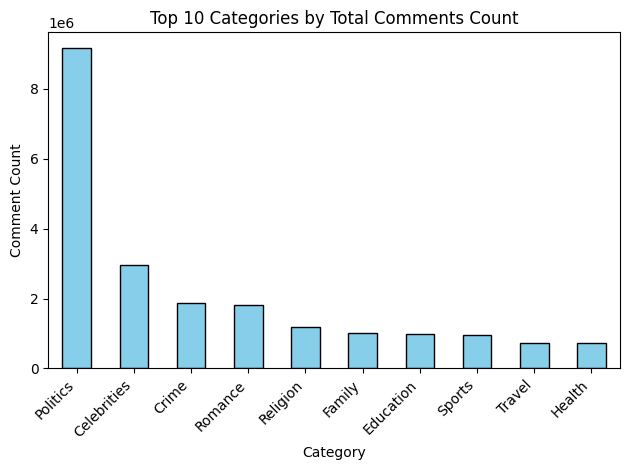

In [38]:
# Top 10 Categories by Comment Count
top_cat_comments = data.groupby('Category')['Comment Count'].sum().sort_values(ascending=False).head(10)
# Format and print the values
formatted_values = top_cat_comments.round().apply(lambda x: "{:,.0f} Comments".format(x))
print(formatted_values)

# Plotting
top_cat_comments.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Categories by Total Comments Count')
plt.ylabel('Comment Count')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.tight_layout()
plt.show()

BOTTOM 10 CATEGORIES (According to Total Comments)

Category
Fashion/Clothing Market               335
Travel Ads                            281
Top Pages                             183
Certification And Training Adverts    126
Software/Programmer Market             89
Business To Business                   82
Web Market                             51
Graphics/Video Market                  46
Computer Market                        36
Literature/Writing Ads                  0
Name: Comment Count, dtype: int64


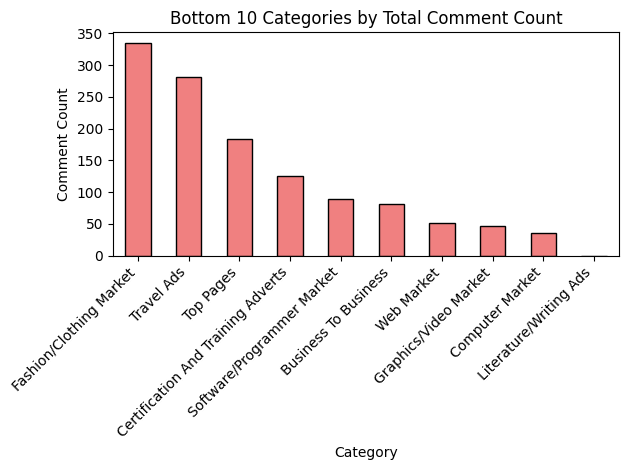

In [39]:
# Bottom 10 Categories by Comment Count
bottom_cat_comments = data.groupby('Category')['Comment Count'].sum().sort_values(ascending=False).tail(10)
print(bottom_cat_comments)

# Plotting
bottom_cat_comments.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Bottom 10 Categories by Total Comment Count')
plt.ylabel('Comment Count')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')  # Rotate category names for better visibility
plt.tight_layout()
plt.show()


 Top 10 categories with highest average comments Per Post

Average Highest Comments Per Post Per Category
Satellite TV Technology        310 Comments (30 Posts)
Nairaland Ads                   286 Comments (3 Posts)
Literature                  192 Comments (1,590 Posts)
Top Pages                       183 Comments (1 Posts)
Educational Services            155 Comments (3 Posts)
Romance                    146 Comments (12,387 Posts)
Family                      138 Comments (7,327 Posts)
Rap Battles                    136 Comments (13 Posts)
Forum Games                   132 Comments (255 Posts)
Phone/Internet Market          132 Comments (19 Posts)
dtype: object


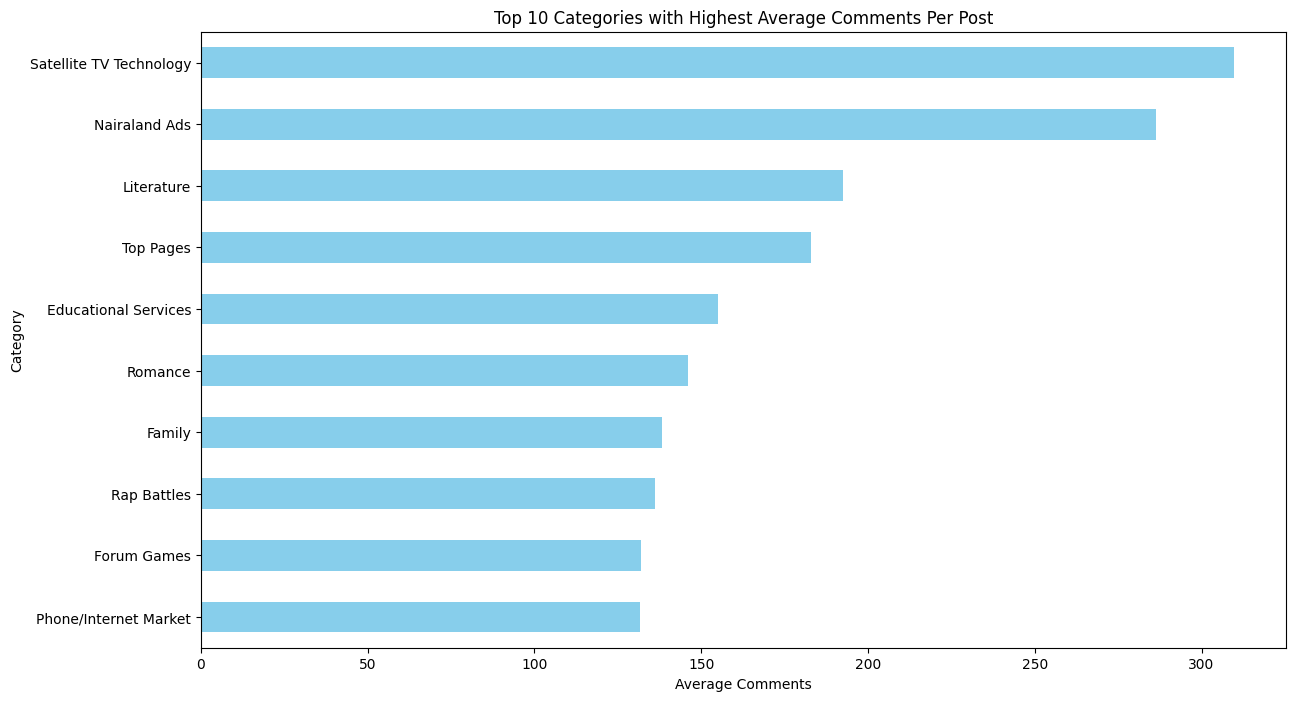

In [42]:
top_cat_average_comments = data.groupby('Category')['Comment Count'].mean().nlargest(10)
num_posts_per_category = data.groupby('Category').size()

# Format the values to include both the average comments and the number of posts
formatted_values_comments = {cat: "{:,.0f} Comments ({:,.0f} Posts)".format(top_cat_average_comments[cat], num_posts_per_category[cat]) for cat in top_cat_average_comments.index}

# Convert to pandas series
formatted_values_series = pd.Series(formatted_values_comments)

print('Average Highest Comments Per Post Per Category')
print(formatted_values_series)

# Display the chart for comments
plt.figure(figsize=(14, 8))
top_cat_average_comments.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Categories with Highest Average Comments Per Post')
plt.xlabel('Average Comments')
plt.ylabel('Category')
plt.show()


 Top 10 categories with highest average comments Per Post

Average Lowest Comments Per Category Per post
Adverts                                       7 Comments (50 Posts)
European Football (EPL, UEFA, La Liga)    44 Comments (3,001 Posts)
Music Business                               33 Comments (13 Posts)
Certification And Training Adverts            32 Comments (4 Posts)
Web Market                                    26 Comments (2 Posts)
Graphics/Video Market                         23 Comments (2 Posts)
Computer Market                               18 Comments (2 Posts)
Business To Business                          16 Comments (5 Posts)
Software/Programmer Market                    15 Comments (6 Posts)
Literature/Writing Ads                         0 Comments (1 Posts)
dtype: object


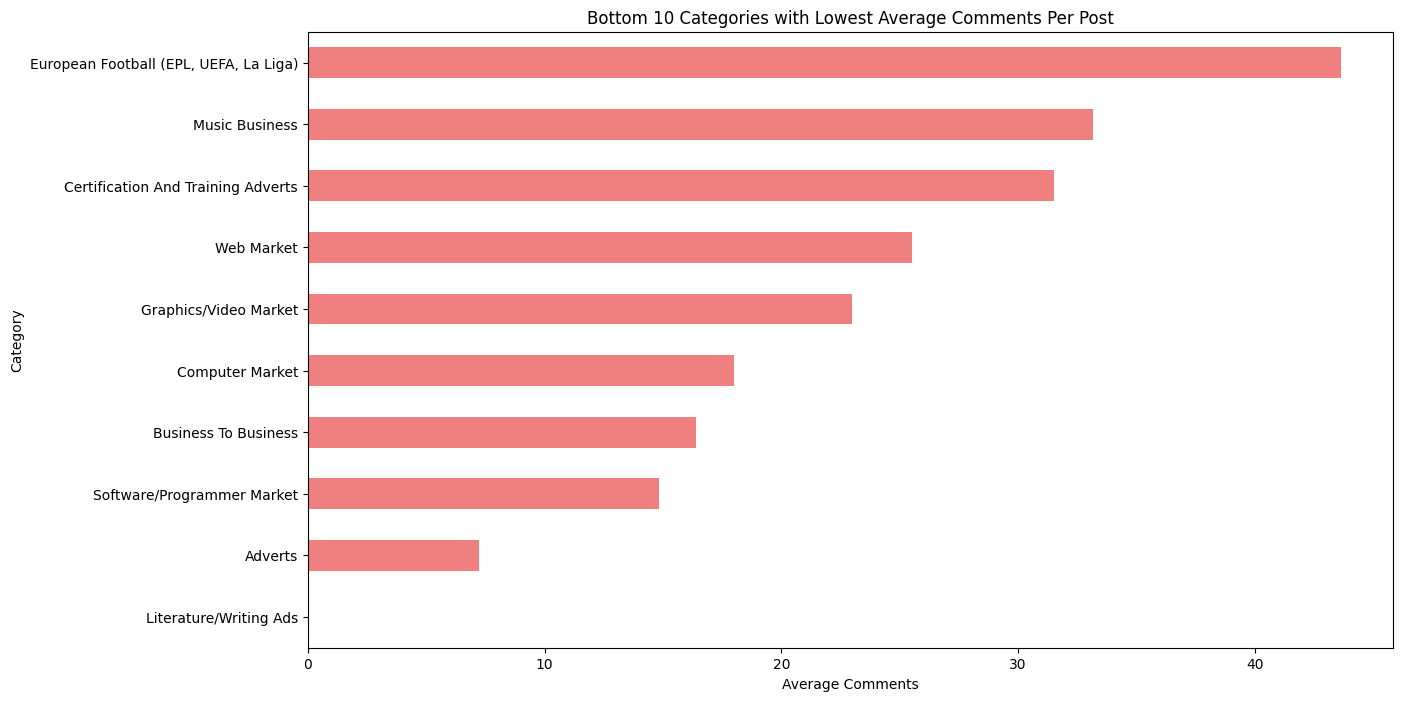

In [45]:
bottom_cat_average_comments = data.groupby('Category')['Comment Count'].mean().nsmallest(10)

# First, we need to determine the number of posts per category
num_posts_per_category = data['Category'].value_counts()

# Format the values to include both the average comments and the number of posts
formatted_values_comments = {cat: "{:,.0f} Comments ({:,.0f} Posts)".format(bottom_cat_average_comments[cat], num_posts_per_category[cat]) for cat in bottom_cat_average_comments.index}

# Convert to pandas series and sort
formatted_values_series = pd.Series(formatted_values_comments).sort_values(ascending=False)

print('Average Lowest Comments Per Category Per post')
print(formatted_values_series)

# Display the chart in descending order for comments per post
plt.figure(figsize=(14, 8))
bottom_cat_average_comments.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Bottom 10 Categories with Lowest Average Comments Per Post')
plt.xlabel('Average Comments')
plt.ylabel('Category')
plt.show()


POSTS WITH HIGHEST NUMBER OF COMMENTS: CATEGORY BY CATEGORY

In [46]:
# Convert 'Comment Count' to numeric (integer) data type
data['Comment Count'] = pd.to_numeric(data['Comment Count'], errors='coerce').fillna(0).astype(int)

# Group by category, then sort and take top for each category
top_per_category = (data.groupby('Category', group_keys=False)
                      .apply(lambda group: group.sort_values(by='Comment Count', ascending=False).head(1)))

# Increase the number of characters displayed in the title column
pd.set_option('display.max_colwidth', 100)  # Adjust 100 to desired number of characters

# Print the top titles without the index
print(top_per_category[[ 'Category', 'Title', 'Comment Count', 'Total Views', 'Date Posted',]].to_string(index=False))

# Reset the display option back to its default for future analyses
pd.reset_option('display.max_colwidth')


                              Category                                                                            Title  Comment Count  Total Views Date Posted
                               Adverts                                              Palm Oil For Sale In Bulk (Nigeria)             32        44368  2006-06-05
                           Agriculture                                                 Starting A Poultry Farm (a Blog)           8687       928263  2012-03-17
                 Art, Graphics & Video                                                                NL Pictures Album            731        89328  2015-10-16
                                 Autos                                     What Are The Advantages Of Buying Used Cars?            894       106578  2013-11-28
                              Business                                                               Forex Trade Alerts           3150        96600  2012-08-10
                  Business To Business  

BOXPLOT VISUALIZATION OF OVERALL COMMENTS

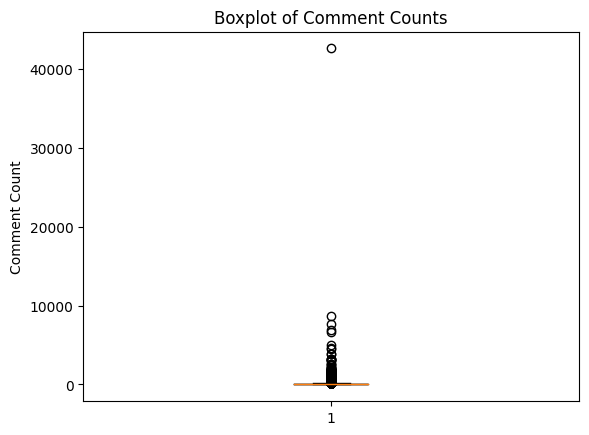

In [47]:
plt.boxplot(data['Comment Count'])
plt.title('Boxplot of Comment Counts')
plt.ylabel('Comment Count')
plt.show()

BOXPLOT VISUALIZATION OF COMMENTS FOR EACH CATEGORY

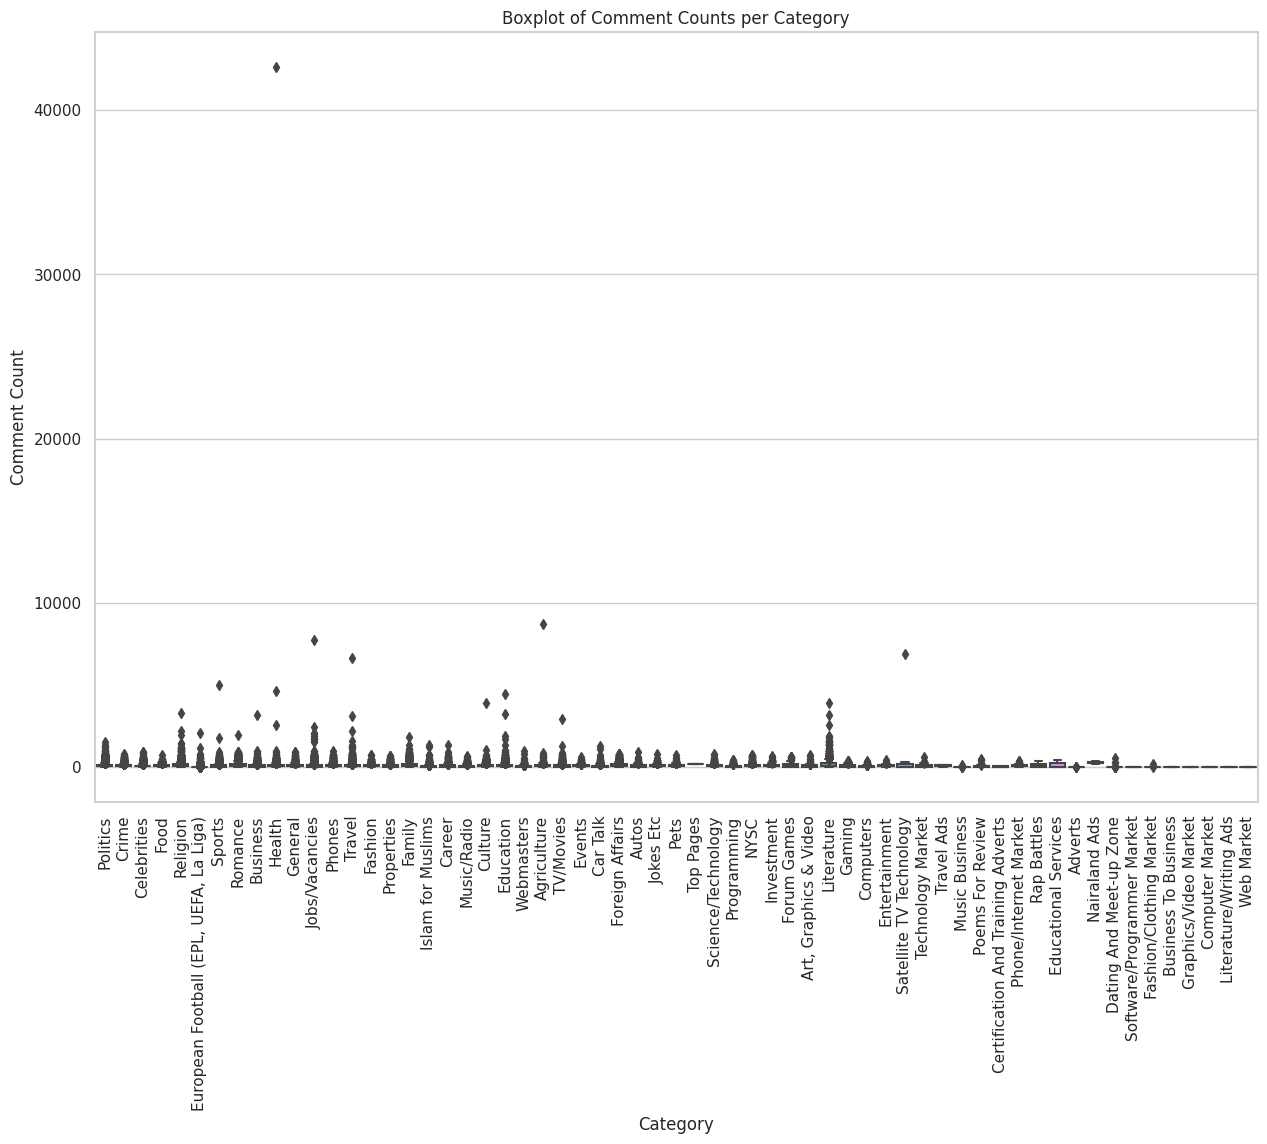

In [48]:
# Set the style of the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
# Create a boxplot of Comment Count per Category
sns.boxplot(x='Category', y='Comment Count', data=data)
# Rotate the x-labels for better readability
plt.xticks(rotation=90)
plt.title("Boxplot of Comment Counts per Category")
plt.show()

COMPARING MEAN, MEDIAN, MAX, MIN, AND STANDARD DEVIATION OF COMMENTS PER CATEGORY

In [49]:
# Using the agg function to apply multiple aggregations
stats_df = data.groupby('Category')['Comment Count'].agg(
    Mean='mean',
    Median='median',
    Max='max',
    Min='min',
    SD='std'
).sort_values(by='Mean', ascending=False)

# Round the results for better readability
stats_df = stats_df.round()

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the stats DataFrame
print(stats_df)

# Reset the display option back to its default for future analyses
pd.reset_option('display.max_rows')

                                         Mean  Median    Max  Min      SD
Category                                                                 
Satellite TV Technology                 310.0    32.0   6864    0  1241.0
Nairaland Ads                           286.0   267.0    377  215    83.0
Literature                              192.0    96.0   3923    0   274.0
Top Pages                               183.0   183.0    183  183     NaN
Educational Services                    155.0    32.0    414   19   224.0
Romance                                 146.0   118.0   1943    0   116.0
Family                                  138.0   105.0   1841    0   119.0
Rap Battles                             136.0   129.0    401    0   120.0
Forum Games                             132.0   107.0    620    0   117.0
Phone/Internet Market                   132.0   100.0    351   29   105.0
Foreign Affairs                         131.0   109.0    808    0   100.0
Religion                              

COMMENT DISTRIBUTION HISTOGRAM

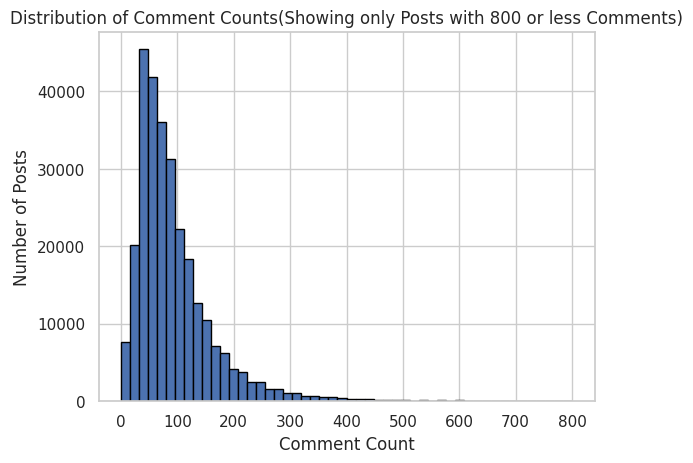

In [50]:
plt.hist(data['Comment Count'], bins=50, edgecolor='black', range=[0, 800])  # limiting x-axis to 800
plt.title('Distribution of Comment Counts(Showing only Posts with 800 or less Comments)')
plt.xlabel('Comment Count')
plt.ylabel('Number of Posts')
plt.show()


NUMBER OF ARTICLES PUBLISHED PER YEAR

<ipython-input-51-61dcd7eeb996>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Year Posted'] = data['Date Posted'].dt.year
<ipython-input-51-61dcd7eeb996>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Month Posted'] = data['Date Posted'].dt.month


Total Number of Articles Published by Year
2005: 597 articles
2006: 1943 articles
2007: 1537 articles
2008: 704 articles
2009: 2293 articles
2010: 3166 articles
2011: 6498 articles
2012: 12211 articles
2013: 14181 articles
2014: 6769 articles
2015: 27826 articles
2016: 36102 articles
2017: 41202 articles
2018: 45187 articles
2019: 42206 articles
2020: 12612 articles
2021: 8974 articles
2022: 7778 articles
2023: 11303 articles


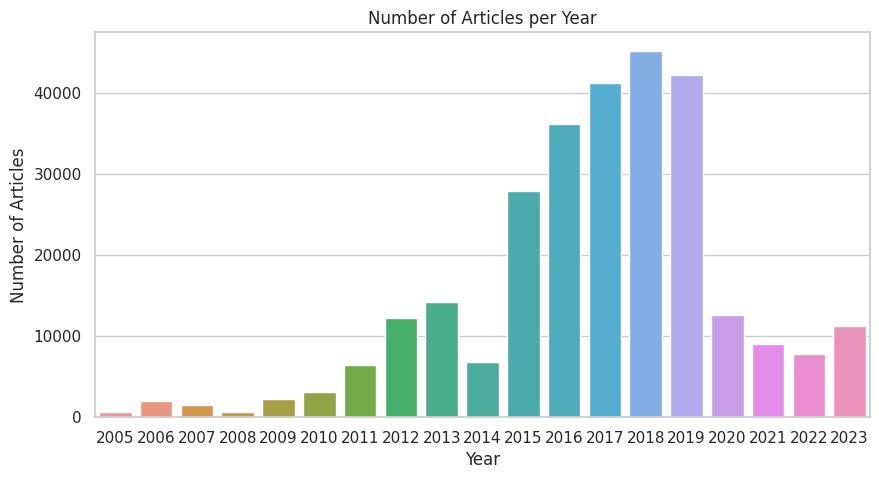

In [51]:
# Remove rows with NaT values in 'Date Posted'
data = data.dropna(subset=['Date Posted'])

# Create new columns for the year and month
data.loc[:, 'Year Posted'] = data['Date Posted'].dt.year
data.loc[:, 'Month Posted'] = data['Date Posted'].dt.month

# Count the number of articles per year and month
articles_per_year = data['Year Posted'].value_counts().sort_index()


# Print the total number of articles published by year
print("Total Number of Articles Published by Year")
for year, count in articles_per_year.items():
    print(f"{year}: {count} articles")

# Plot the number of articles per year
plt.figure(figsize=(10, 5))
sns.barplot(x=articles_per_year.index, y=articles_per_year.values)
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

NUMBER OF ARTICLES PUBLISHED ACCORDING TO MONTHS IN A YEAR


Total Number of Articles Published by Month
Jan: 25531 articles
Feb: 21059 articles
Mar: 22118 articles
Apr: 25052 articles
May: 22509 articles
Jun: 22978 articles
Jul: 26463 articles
Aug: 23401 articles
Sep: 24940 articles
Oct: 22237 articles
Nov: 23396 articles
Dec: 23405 articles


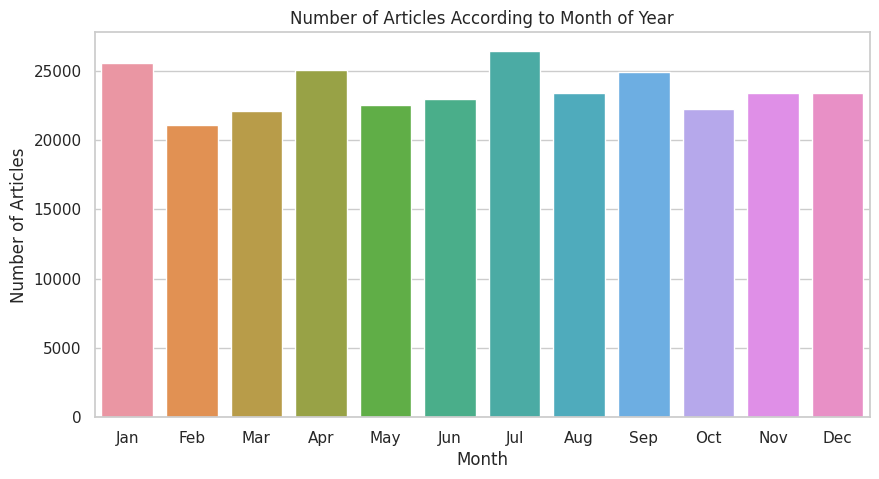

In [52]:
articles_per_month = data['Month Posted'].value_counts().sort_index()

# Print the total number of articles published by month
print("\nTotal Number of Articles Published by Month")
for month, count in articles_per_month.items():
    month_name = calendar.month_abbr[month]
    print(f"{month_name}: {count} articles")

# Plot the number of articles per month
plt.figure(figsize=(10, 5))
sns.barplot(x=articles_per_month.index, y=articles_per_month.values)
plt.title('Number of Articles According to Month of Year')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

# Replacing the numbers with month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(range(12), month_names)
plt.show()

HEATMAP VISUALIZATION OF MONTHLY POSTS PUBLISHED

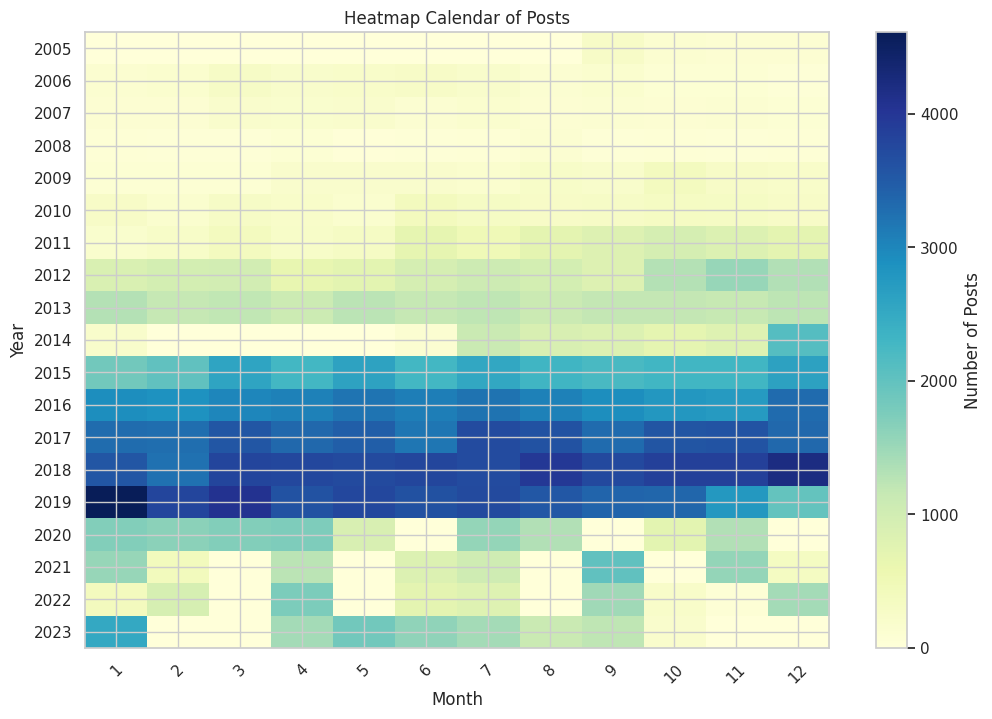

In [53]:
# Group by year and month
grouped = data.groupby([data['Date Posted'].dt.year, data['Date Posted'].dt.month]).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(grouped, cmap="YlGnBu", aspect="auto")
plt.colorbar(label="Number of Posts")
plt.yticks(range(grouped.shape[0]), grouped.index)
plt.xticks(range(grouped.shape[1]), grouped.columns, rotation=45)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap Calendar of Posts')
plt.show()


Distribution of Posts by Hour of the Day

<ipython-input-54-2282affe164e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour Posted'] = pd.to_datetime(data['Time Posted'], format='%I:%M%p', errors='coerce').dt.hour


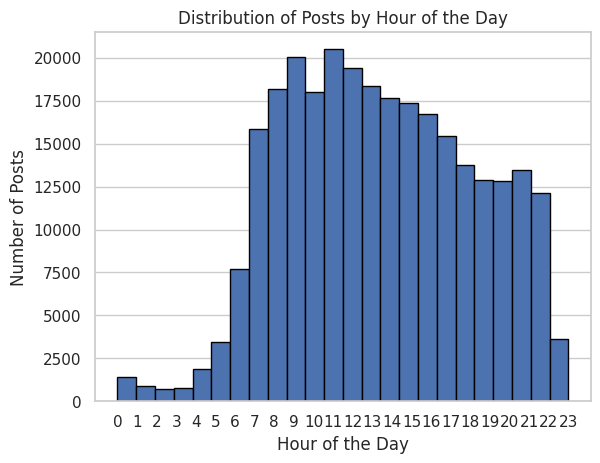

In [54]:
plt.xlabel('Hour of the Day')
# Convert 'Time Posted' to datetime format and extract hour
data['Hour Posted'] = pd.to_datetime(data['Time Posted'], format='%I:%M%p', errors='coerce').dt.hour

# Plotting distribution over hours
data['Hour Posted'].hist(bins=24, edgecolor='black')
plt.title('Distribution of Posts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(24))
plt.grid(axis='x')
plt.show()

RELATIONSHIP BETWEEN TIME OF POST AND NUMBER OF COMMENTS

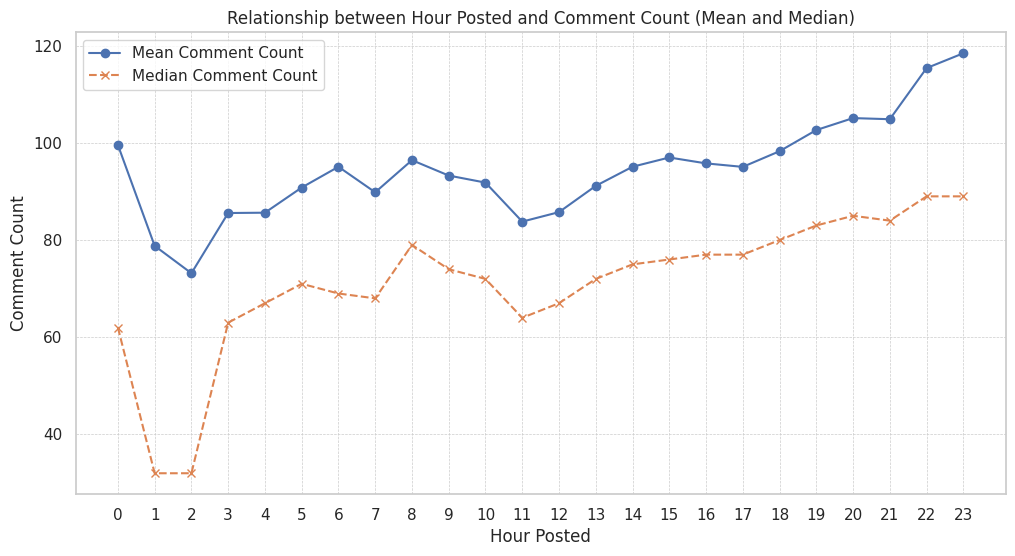

In [55]:
hourly_data = data.groupby('Hour Posted').agg({
    'Comment Count': ['mean', 'median'],
    'Total Views': ['mean', 'median']
}).reset_index()
hourly_data.columns = ['Hour Posted', 'Comment Count Mean', 'Comment Count Median', 'Total Views Mean', 'Total Views Median']

plt.figure(figsize=(12,6))
plt.plot(hourly_data['Hour Posted'], hourly_data['Comment Count Mean'], marker='o', label='Mean Comment Count')
plt.plot(hourly_data['Hour Posted'], hourly_data['Comment Count Median'], marker='x', linestyle='--', label='Median Comment Count')
plt.xlabel('Hour Posted')
plt.ylabel('Comment Count')
plt.title('Relationship between Hour Posted and Comment Count (Mean and Median)')
plt.xticks(hourly_data['Hour Posted'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Relationship between Hour Posted and Total Views Garnered

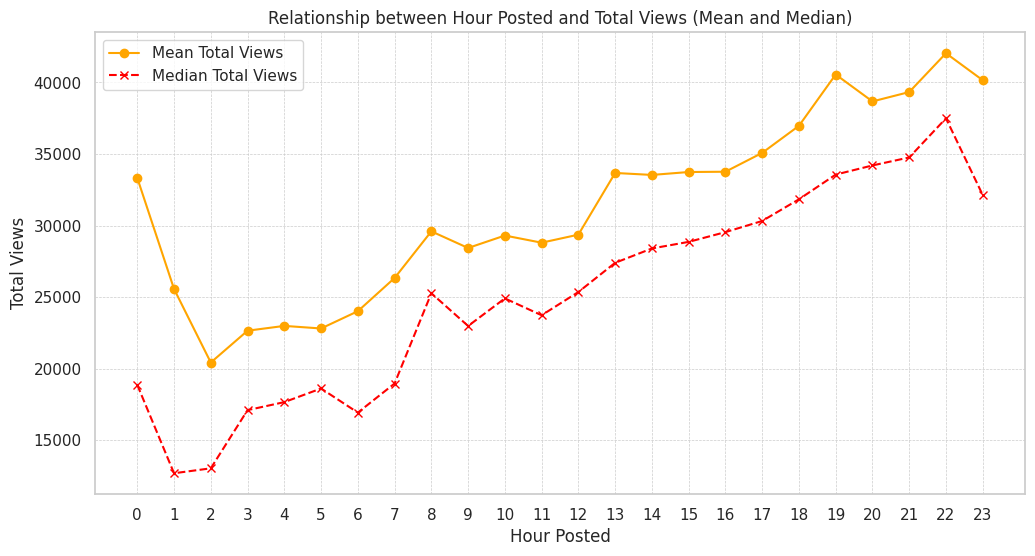

In [56]:
plt.figure(figsize=(12,6))
plt.plot(hourly_data['Hour Posted'], hourly_data['Total Views Mean'], marker='o', label='Mean Total Views', color='orange')
plt.plot(hourly_data['Hour Posted'], hourly_data['Total Views Median'], marker='x', linestyle='--', label='Median Total Views', color='red')
plt.xlabel('Hour Posted')
plt.ylabel('Total Views')
plt.title('Relationship between Hour Posted and Total Views (Mean and Median)')
plt.xticks(hourly_data['Hour Posted'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [57]:
data

,Title,Body,Category,Comments,Comment Count,Time Posted,Date Posted,Total Views,Url,Source Url,Year Posted,Month Posted,Hour Posted
0,PDP G-5 Govs Return To Rivers After UK Meeting,"The G-5 governors, popularly known as the ‘Int...",Politics,They keep wasting tax payers money flying up a...,105,10:39am,2022-12-31,19958,https://www.nairaland.com/7503295/pdp-g-5-govs...,https://leadership.ng/pdp-g-5-govs-return-to-r...,2022,12,10.0
1,Suspected Bandits Kill Young Man Weeks After C...,Suspected bandits have killed a young man who ...,Crime,Cc: Lalasticlala Nlfpmod Mynd44 And Seun;;;See...,47,10:38am,2022-12-31,14780,https://www.nairaland.com/7503173/suspected-ba...,NaN,2022,12,10.0
2,"9ice And His Wife, Sunkanmi Celebrates 3rd Wed...","Nigerian singer, Abolore Akande, popularly kno...",Celebrities,Ever since he was caught wankeen and pressing ...,82,10:38am,2022-12-31,26746,https://www.nairaland.com/7503347/9ice-wife-su...,https://www.instagram.com/p/CmyieHvoAmh/?utm_s...,2022,12,10.0
3,Onslaught Launched Against Killer-herdsmen In ...,•Amotekun combs Ondo forests •Ogun buys drones...,Politics,You can't be killing people for their God give...,116,10:35am,2022-12-31,19400,https://www.nairaland.com/7503670/onslaught-la...,https://tribuneonlineng.com/onslaught-launched...,2022,12,10.0
4,Man Beat Daughter To Death For Using His Phone...,The Akwa Ibom State Police Command on Friday p...,Crime,"The man went too far, there are dozens of ways...",145,10:01am,2022-12-31,51314,https://www.nairaland.com/7503259/man-beat-dau...,NaN,2022,12,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283117,Is El-rufai Behind The Zaria Church Bombing?,I just got this bb message and thought i shoul...,Politics,^^my friend hush. . .what agenda r u talking a...,151,6:49pm,2012-06-19,18866,https://www.nairaland.com/968592/el-rufai-behi...,NaN,2012,6,18.0
283118,Many Married Men Are Unhappy...,It has been scientifically proven that many me...,Family,"Nice piece, like we all know the truth is alwa...",406,4:20pm,2012-06-08,44806,https://www.nairaland.com/958447/many-married-...,NaN,2012,6,16.0
283119,Are Fake Designer Wears And Accessories Fashio...,Is Fake Fashion OK?I had a friend come visit i...,Fashion,"Fake it till you make it, what happens if you ...",29,3:44pm,2012-05-31,5400,https://www.nairaland.com/913869/fake-designer...,NaN,2012,5,15.0
283120,What Happened To TB Joshua's Champions League ...,Initially reports had it that T.B Joshua predi...,Sports,God reveals so that we canattend to it...........,109,11:46am,2012-05-20,30082,https://www.nairaland.com/942138/erm-what-happ...,NaN,2012,5,11.0


SAMPLE DATA FROM THE SOURCE URLS COLUMN

In [58]:
data['Source Url'].sample(20)

222143    http://dailypost.com.ng/2013/05/08/breaking-ef...
199414    http://www.vanguardngr.com/2015/04/senate-pres...
232387                                                  NaN
169254             https://www.instagram.com/p/BGrBkJrykFv/
110785    http://www.autoreportng.com/2018/01/see-this-1...
234528                                                  NaN
93118     http://www.ebiwalisgossip.com/2018/06/man-reve...
149176    http://investorsking.com/cbn-to-sell-dollars-i...
170229    https://www.youtube.com/watch?v=buEBcmWd7WIhtt...
7613      https://politicsnigeria.com/exclusive-gowon-re...
117598    http://www.trezzyhelm.com/2017/11/police-offic...
228342                                                  NaN
252759    http://234next.com/csp/cms/sites/Next/Home/563...
50227                                                   NaN
180790                                                  NaN
141377    http://punchng.com/housewife-caught-with-alleg...
117119    http://www.torimill.com/2017/1

PERCENTAGE OF POST WITH/WITHOUT SOURCE URLS

In [59]:
total_posts = len(data)
with_source = data['Source Url'].notna().sum()
without_source = data['Source Url'].isna().sum()

print(f"Percentage of posts with Source URL: {with_source/total_posts * 100:.2f}%")
print(f"Percentage of posts without Source URL: {without_source/total_posts * 100:.2f}%")


Percentage of posts with Source URL: 75.46%
Percentage of posts without Source URL: 24.54%


TOP CITED WEBSITES

<ipython-input-60-71dd16dbcbb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Domain'] = data['Source Url'].dropna().apply(get_domain)


www.youtube.com           12029
www.vanguardngr.com        8593
punchng.com                6580
www.instagram.com          6205
www.nationalhelm.co        5052
www.trezzyhelm.com         4812
thenationonlineng.net      3951
www.punchng.com            3946
twitter.com                3846
dailypost.ng               3495
www.premiumtimesng.com     3136
www.dailytrust.com.ng      2994
gistmore.com               2656
saharareporters.com        2630
www.lailasblog.com         2483
mobile.twitter.com         2390
www.google.com             2246
www.nairaland.com          2085
m.facebook.com             1998
www.nationalhelm.net       1965
Name: Domain, dtype: int64


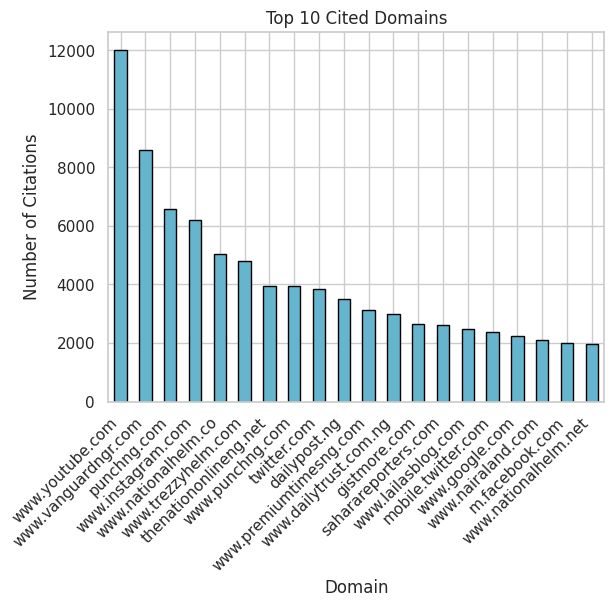

In [60]:
from urllib.parse import urlparse

def get_domain(url):
    try:
        return urlparse(url).netloc
    except:
        return "Invalid URL"

data['Domain'] = data['Source Url'].dropna().apply(get_domain)

# Now, count and display the most cited domains
top_domains = data['Domain'].value_counts().head(20)
print(top_domains)

# For plotting
import matplotlib.pyplot as plt

top_domains.plot(kind='bar', color='c', edgecolor='black')
plt.title('Top 10 Cited Domains')
plt.ylabel('Number of Citations')
plt.xlabel('Domain')
plt.xticks(rotation=45, ha='right')
plt.show()


PERCENTAGE OF POSTS WITH SOURCE URL

In [61]:
# Count of posts with source URLs by category
with_source_by_category = data[data['Source Url'].notna()].groupby('Category').size()

# Count of posts without source URLs by category
without_source_by_category = data[data['Source Url'].isna()].groupby('Category').size()

percentage_with_source_by_category = with_source_by_category / (with_source_by_category + without_source_by_category) * 100
pd.set_option('display.max_rows', None)
print(percentage_with_source_by_category.sort_values(ascending=False))

# Reset the display option to its default
pd.reset_option('display.max_rows')

Category
Crime                                     93.366516
Celebrities                               92.137478
Foreign Affairs                           86.148347
Politics                                  85.646662
Sports                                    78.581865
Travel                                    76.220472
Health                                    75.391114
Science/Technology                        75.328330
Business                                  73.233204
Entertainment                             72.839506
Events                                    70.610399
TV/Movies                                 69.446099
Music/Radio                               69.086022
Car Talk                                  66.847265
Nairaland Ads                             66.666667
Culture                                   66.082121
Education                                 63.018752
Investment                                59.706362
Agriculture                               59.410112
NYS

In [62]:
def clean_text(data):
    if pd.isna(data):
        return ""

    data = str(data)  # Convert data to string
    data = data.lower()

    # Remove URLs
    data = re.sub(r'http\S+|www\S+|https\S+', '', data, flags=re.MULTILINE)

    # Remove HTML tags
    data = re.sub(r'<.*?>', '', data)

    # Remove punctuations and emojis
    punct_tag = re.compile(r'[^\w\s]')
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)

    data = punct_tag.sub(r'', data)
    data = emoji_clean.sub(r'', data)

    # Remove non-informative words
    non_informative_words = {'was', 'has', 'said', 'like', 'one','dey', 'na', 'will', 'said', 'wey', 'and', 'to', 'of'}
    words = data.split()
    data = ' '.join([word for word in words if word.lower() not in non_informative_words])

    # Remove numbers except for years (assuming years to be 4-digit numbers from 1000 to current year)
    data = re.sub(r'\b(?!\d{4}\b)\d+\b', '', data)

    # Lemmatization
    wn = WordNetLemmatizer()
    lemmatized_words = []
    for w in data.split():
        if w.lower() == "lagos":  # Check for the word "Lagos" in a case-insensitive manner
            lemmatized_words.append(w)  # Append the word "Lagos" as-is without lemmatizing
        else:
            lemmatized_words.append(wn.lemmatize(w))
    data = ' '.join(lemmatized_words)


    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = data.split()
    data = ' '.join([word for word in words if word.lower() not in stop_words])

    return data




APPLY THE CLEAN_TEXT FUNCTION TO THE TITLE AND BODY COLUMNS

In [63]:
data['Title'] = data['Title'].apply(clean_text)
data['Body'] = data['Body'].apply(clean_text)


<ipython-input-63-8a4a73c23518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].apply(clean_text)
<ipython-input-63-8a4a73c23518>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Body'] = data['Body'].apply(clean_text)


### N-GRAM ANALYSIS AND WORDCLOUD VISUALIZATION

FUNCTION TO GENERATE N-GRAMS, BAR CHART OF N-GRAMS, WORDCLOUD VISUALIZATION

In [64]:
# Preprocess titles by making them lowercase
data['Title'] = data['Title'].str.lower()

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Define custom stopwords
custom_stopwords = list(ENGLISH_STOP_WORDS) + ['com', 'http', 'https', 'www', 'youtube', 'instagram']

def url_cleaner(text):
    # Use regex to remove any URL-like patterns
    text = re.sub(r'https?://\S+|www\.\S+|@\S+', '', text)
    return text

def display_and_visualize_ngrams(data, column_name, ngram_val, top_n=15):
    vectorizer = CountVectorizer(ngram_range=(ngram_val, ngram_val), stop_words=custom_stopwords, preprocessor=url_cleaner)
    ngram_counts = vectorizer.fit_transform(data[column_name].dropna())  # drop NaN values

    ngram_names = vectorizer.get_feature_names_out()
    ngram_sum = ngram_counts.sum(axis=0)
    ngram_freq = [(word, ngram_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

    # Display the top n-grams
    for word, freq in ngram_freq[:top_n]:
        print(word, freq)

    # Bar chart
    words, freqs = zip(*ngram_freq[:top_n])
    plt.figure(figsize=(10,6))
    plt.barh(words, freqs)
    plt.gca().invert_yaxis()
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} {ngram_val}-grams in News Article's {column_name}')
    plt.show()

# Don't forget the word cloud function if you want to use it.


    # wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

<ipython-input-64-7810dc1828db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].str.lower()


UNIGRAM ANALYSIS OF ARTICLE TITLES

photo 42363
nigerian 14093
nigeria 13752
buhari 11633
man 10577
lagos 10092
state 8404
new 7119
video 6951
apc 6435
picture 6261
woman 6192
lady 5926
wife 5836
pic 5687


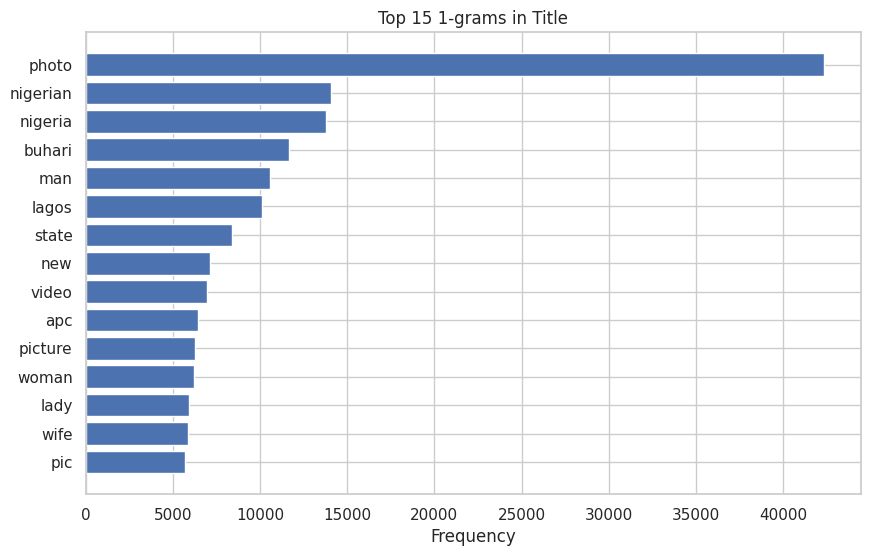

In [65]:
display_and_visualize_ngrams(data, 'Title', 1, 15)


BIGRAM ANALYSIS OF ARTICLE TITLES

boko haram 2625
president buhari 1704
graphic photo 1639
new photo 1196
state photo 1091
lagos photo 1061
peter obi 1034
throwback photo 897
akwa ibom 889
tiwa savage 829
photo video 828
world cup 807
nigerian man 776
river state 772
dino melaye 766


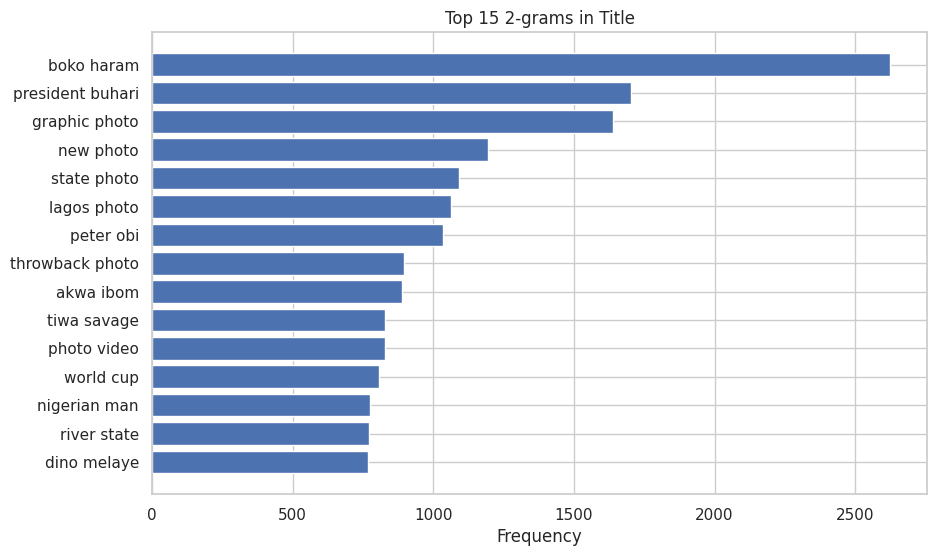

In [66]:
display_and_visualize_ngrams(data, 'Title', 2, 15)

TRIGRAM ANALYSIS OF ARTICLE TITLES

job recruitment position 480
state graphic photo 223
boko haram attack 189
big brother naija 171
river state photo 165
got people talking 150
boko haram member 141
boko haram terrorist 138
killed boko haram 118
orji uzor kalu 116
latest job recruitment 115
delta state photo 114
akwa ibom state 112
best graduating student 110
akwa ibom photo 109


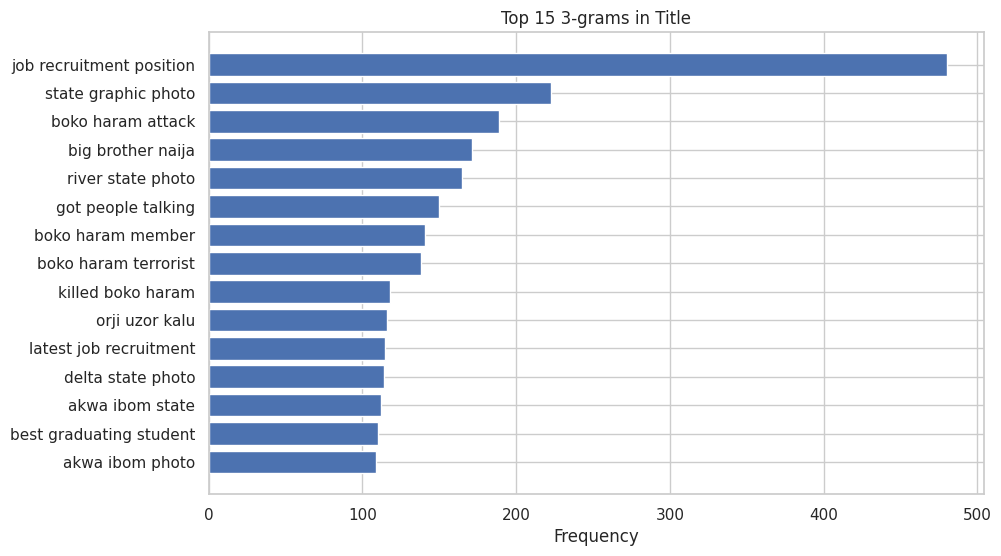

In [67]:
display_and_visualize_ngrams(data, 'Title', 3, 15)

WORDCLOUD OF NEWS ARTICLE TITLE

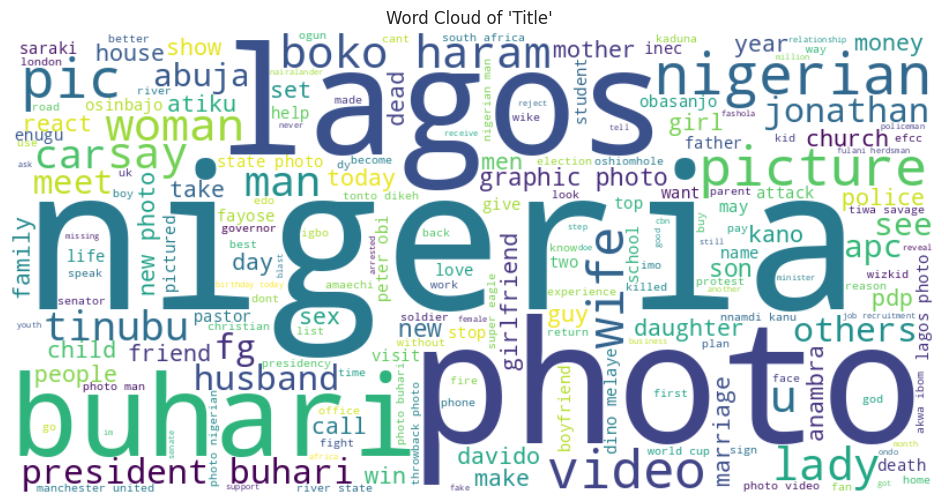

In [68]:
# Combine all news article titles
all_title = ' '.join(data['Title'])

# Generate Word Clouds for titles and bodies
generate_wordcloud(all_title, "Word Cloud of 'Title' ")

UNIGRAM ANALYSIS OF NEW ARTICLE BODIES

state 320582
nigeria 182838
people 180344
government 162423
president 155480
nigerian 151304
time 122262
year 118035
governor 117412
party 107168
national 92861
country 91328
mr 91318
police 88124
know 87582


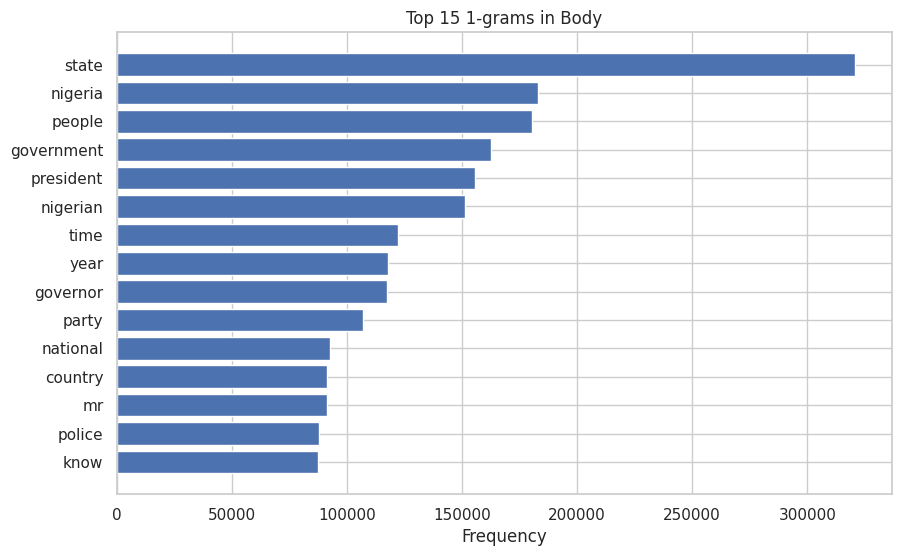

In [69]:
display_and_visualize_ngrams(data, 'Body', 1, 15)

BIGRAM ANALYSIS OF NEW ARTICLE BODIES

federal government 28839
local government 24214
state government 21487
lagos state 21324
muhammadu buhari 19695
state governor 18553
president muhammadu 18040
boko haram 17874
national assembly 15623
progressive congress 15236
social medium 15095
democratic party 14667
people democratic 14335
government area 13662
river state 13340


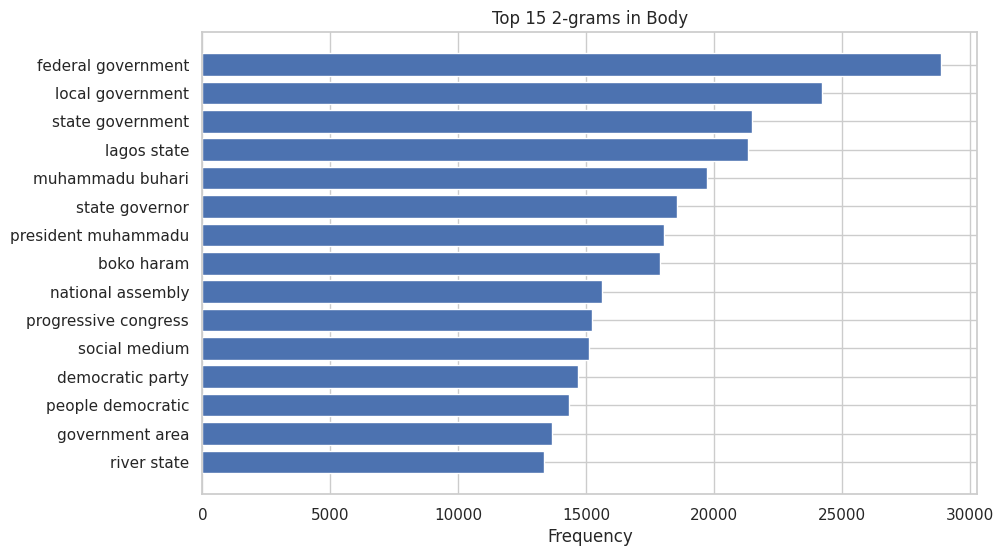

In [70]:
display_and_visualize_ngrams(data, 'Body', 2, 15)

TRIGRAM ANALYSIS OF NEWS ARTICLE BODIES

president muhammadu buhari 14764
people democratic party 13611
local government area 13538
progressive congress apc 10192
democratic party pdp 8888
president goodluck jonathan 6848
federal high court 5461
economic financial crime 5146
financial crime commission 4831
independent national electoral 4741
national electoral commission 4577
state police command 4470
state house assembly 4415
public relation officer 4215
central bank nigeria 3774


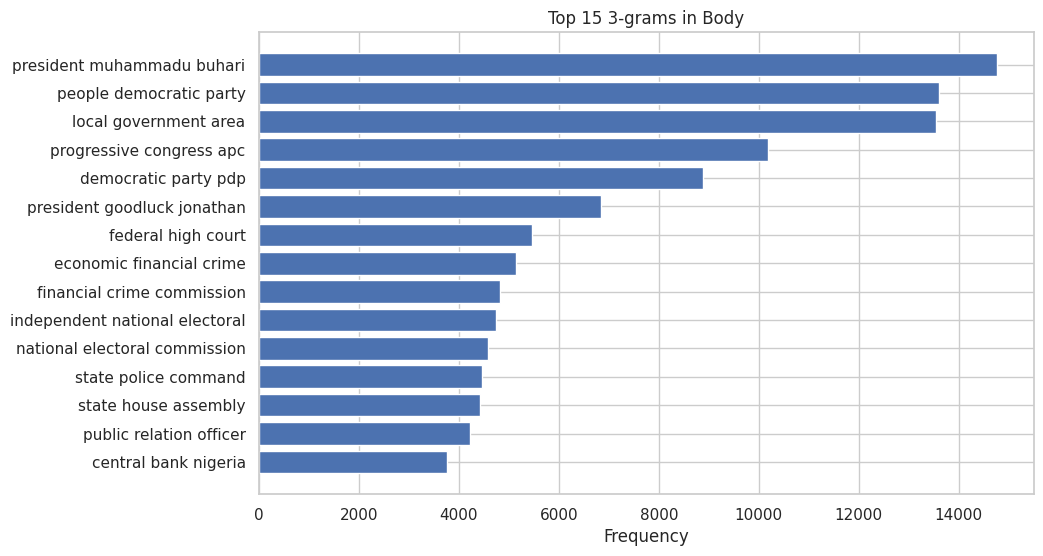

In [71]:
display_and_visualize_ngrams(data, 'Body', 3, 15)

WORDCLOUD OF NEWS ARTICLE BODIES

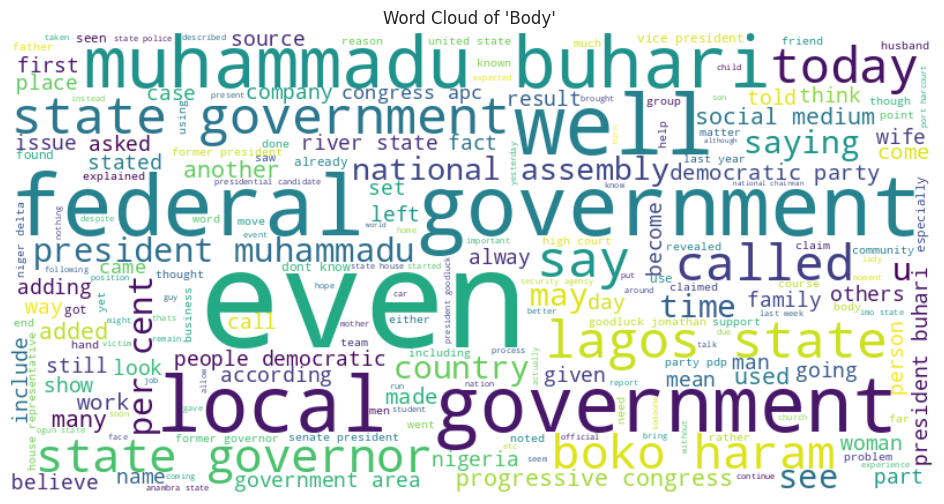

In [72]:
# Combine all news article bodies
all_body = ' '.join(data['Body'])

# Generate Word Clouds for titles and bodies
generate_wordcloud(all_body, "Word Cloud of 'Body' ")

# TEXT CLASSIFICATION

### Retaining only columns useful for Classification

In [73]:
# Select the columns of interest
columns_of_interest = ['Title', 'Body', 'Category']
data = data[columns_of_interest]
data

,Title,Body,Category
0,pdp g5 govs return river uk meeting,g5 governor popularly known integrity group wi...,Politics
1,suspected bandit kill young man week completin...,suspected bandit killed young man completed na...,Crime
2,9ice wife sunkanmi celebrates 3rd wedding anni...,nigerian singer abolore akande popularly known...,Celebrities
3,onslaught launched killerherdsmen southwest,amotekun comb ondo forest ogun buy drone monit...,Politics
4,man beat daughter death using phone call boyfr...,akwa ibom state police command friday paraded ...,Crime
...,...,...,...
283117,elrufai behind zaria church bombing,got bb message thought share breaking news per...,Politics
283118,many married men unhappy,scientifically proven many men become unhappy ...,Family
283119,fake designer wear accessory fashionable,fake fashion oki friend come visit ny wanted g...,Fashion
283120,happened tb joshua champion league prediction,initially report tb joshua predicted saw match...,Sports


Category
Business                                   7457
Car Talk                                   3876
Career                                     3808
Celebrities                               38639
Crime                                     21497
Culture                                    2338
Education                                  9759
European Football (EPL, UEFA, La Liga)     2997
Events                                     1327
Family                                     7327
Fashion                                    1968
Food                                       1883
Foreign Affairs                            3357
General                                    2836
Health                                     6392
Islam for Muslims                          2154
Jobs/Vacancies                             5005
Literature                                 1590
Music/Radio                                2232
NYSC                                       1461
Phones                         

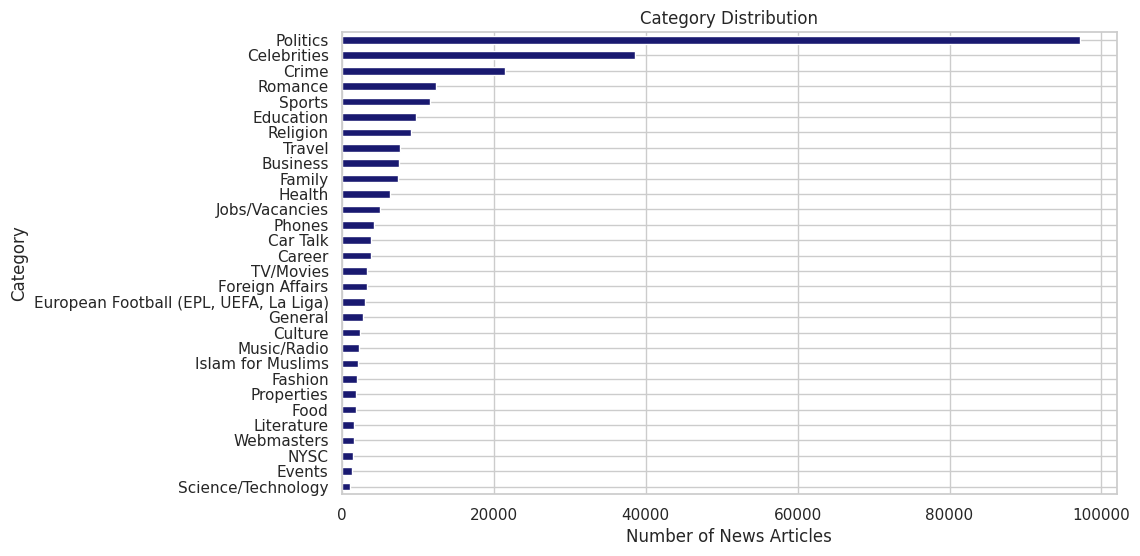

In [74]:
categories_to_keep = data['Category'].value_counts()[data['Category'].value_counts() >= 1000].index

# Filter the DataFrame to retain only the categories with at least 1000 news articles
data = data[data['Category'].isin(categories_to_keep)]

category_distribution_count = data.pivot_table(index=['Category'], aggfunc='size')
print(category_distribution_count)


plt.figure(figsize=(10,6))
category_distribution_count.sort_values(ascending=True).plot(kind='barh', color='midnightblue')

plt.xlabel('Number of News Articles')
plt.ylabel('Category')
plt.title('Category Distribution')

plt.show()

### GETTING THE DATA READY FOR CLASSIFICATION

### A Mix of OverSampling & UnderSampling to balance the data

In [81]:
target = 'Category'
desired_samples = 10000

# Get the unique categories and their counts
category_counts = data[target].value_counts()

# Initialize the RandomUnderSampler and RandomOverSampler
under_sampler = RandomUnderSampler(sampling_strategy={})
over_sampler = RandomOverSampler(sampling_strategy={})

# Loop through the categories and set the desired number of samples for under-sampling and over-sampling
for cat, count in category_counts.items():
    if count > desired_samples:
        under_sampler.sampling_strategy[cat] = desired_samples
    elif count < desired_samples:
        over_sampler.sampling_strategy[cat] = desired_samples

# Apply the under-sampling to reduce the majority class samples
X_under, y_under = under_sampler.fit_resample(data.drop(target, axis=1), data[target])

# Combine the under-sampled data with the original category labels
data_under = pd.concat([X_under, y_under], axis=1)

# Apply the over-sampling to increase the minority class samples
X_over, y_over = over_sampler.fit_resample(data_under.drop(target, axis=1), data_under[target])

# Combine the over-sampled data with the original category labels
balanced_data = pd.concat([X_over, y_over], axis=1)

Category
Business                                  10000
Car Talk                                  10000
Career                                    10000
Celebrities                               10000
Crime                                     10000
Culture                                   10000
Education                                 10000
European Football (EPL, UEFA, La Liga)    10000
Events                                    10000
Family                                    10000
Fashion                                   10000
Food                                      10000
Foreign Affairs                           10000
General                                   10000
Health                                    10000
Islam for Muslims                         10000
Jobs/Vacancies                            10000
Literature                                10000
Music/Radio                               10000
NYSC                                      10000
Phones                         

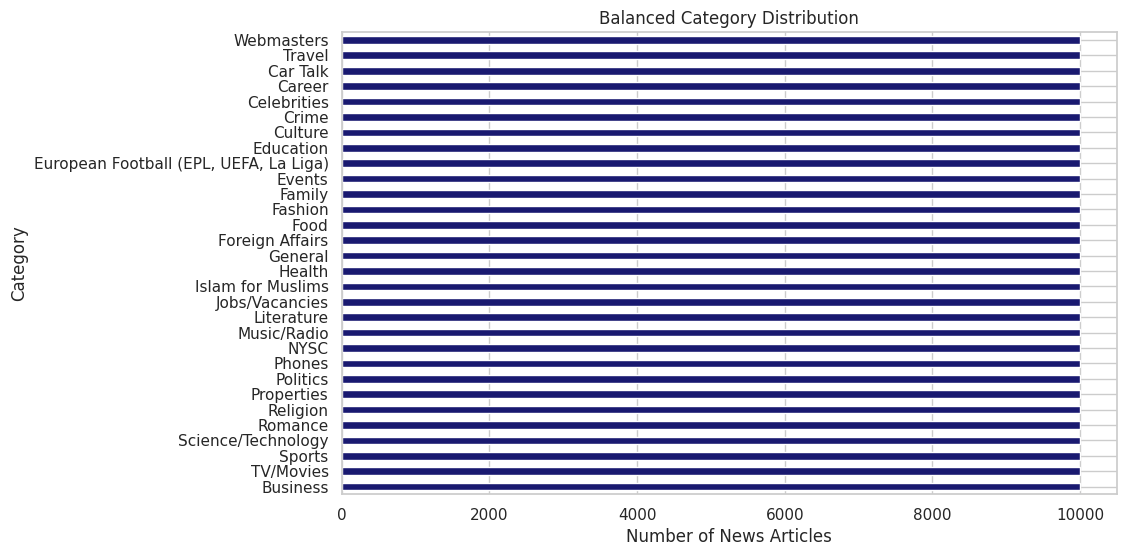

In [82]:
balanced_data_cat_distribution = balanced_data.pivot_table(index=['Category'], aggfunc='size')
print(balanced_data_cat_distribution)

plt.figure(figsize=(10,6))
balanced_data_cat_distribution.sort_values(ascending=True).plot(kind='barh', color='midnightblue')

plt.xlabel('Number of News Articles')
plt.ylabel('Category')
plt.title('Balanced Category Distribution')

plt.show()

### Joining the News Article Title and Body

In [95]:
balanced_data['Text'] = balanced_data['Title'] + " " + balanced_data['Body']
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True) #Shuffling the data
balanced_data

,Title,Body,Category,Text
0,dangote announces reduction price cement,nigeria largest cement producer dangote cement...,Business,dangote announces reduction price cement niger...
1,wife belief occultic,married wife 10years 1st child year health cha...,Family,wife belief occultic married wife 10years 1st ...
2,barrister proposes woman chafing dish photo,young barrister took woman supposed small part...,Romance,barrister proposes woman chafing dish photo yo...
3,step take creating website,various way reason want make presence world wi...,Webmasters,step take creating website various way reason ...
4,barcelona v arsenal ucl,arsenal fan need overcome another miserable ni...,"European Football (EPL, UEFA, La Liga)",barcelona v arsenal ucl arsenal fan need overc...
...,...,...,...,...
299995,behavior ruin relationship avoid,relationship start fun could imagine short cou...,Romance,behavior ruin relationship avoid relationship ...
299996,etisalat customer care thread,thread opened etisalat subscriber intending et...,Phones,etisalat customer care thread thread opened et...
299997,name 23man team keshi take world cup,based performance south africa qualifier frien...,Sports,name 23man team keshi take world cup based per...
299998,femi otedola old school gadget,daughter temi shared via snapchatsource,Business,femi otedola old school gadget daughter temi s...


In [96]:
# Splitting the data into a training set (80%) and a temporary set (20%)
train_data, temp_data, train_labels, temp_labels = train_test_split(
    balanced_data['Text'], balanced_data['Category'], test_size=0.20, random_state=42)

# Split the temporary set into validation (50% of 20% = 10% original) and testing (50% of 20% = 10% of original) sets
test_data, val_data, test_labels, val_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, random_state=42)

In [97]:
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_labels)
val_labels = encoder.transform(val_labels)
test_labels = encoder.transform(test_labels)

### Loading Pre-trained Embedding and Creating Embedding Layer


In [98]:
embedding_model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding_model, input_shape=[], dtype=tf.string, trainable=True)

### Building the Neural Network Model

In [99]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(len(encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 30)                510       
                                                                 
Total params: 48191926 (183.84 MB)
Trainable params: 48191926 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the Model

In [90]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Setting Up Early Stopping Callback

In [91]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',       # Monitor the validation loss
    patience=3,               # Number of epochs with no improvement after which training will be stopped
    verbose=1,                # Show a message when training is stopped
    restore_best_weights=True # Restore the model weights from the epoch with the best value
)

### Training the Model

In [92]:
start_time = time.time() # Start the timer
history = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(val_data, val_labels),
    callbacks=[early_stopping_callback] # Adding the callback to the fit function
)
end_time = time.time() # End the timer

# Print the time taken to train the model
print("Time taken to train the model: ", end_time - start_time, "seconds")


Epoch 1/20
469/469 [==============================] - 271s 576ms/step - loss: 1.7551 - accuracy: 0.5756 - val_loss: 0.9341 - val_accuracy: 0.7611
Epoch 2/20
469/469 [==============================] - 266s 567ms/step - loss: 0.7306 - accuracy: 0.8111 - val_loss: 0.6816 - val_accuracy: 0.8221
Epoch 3/20
469/469 [==============================] - 264s 562ms/step - loss: 0.5091 - accuracy: 0.8681 - val_loss: 0.5696 - val_accuracy: 0.8499
Epoch 4/20
469/469 [==============================] - 264s 562ms/step - loss: 0.3782 - accuracy: 0.9036 - val_loss: 0.5093 - val_accuracy: 0.8700
Epoch 5/20
469/469 [==============================] - 264s 563ms/step - loss: 0.2882 - accuracy: 0.9283 - val_loss: 0.4743 - val_accuracy: 0.8812
Epoch 6/20
469/469 [==============================] - 266s 568ms/step - loss: 0.2218 - accuracy: 0.9462 - val_loss: 0.4582 - val_accuracy: 0.8888
Epoch 7/20
469/469 [==============================] - 273s 581ms/step - loss: 0.1709 - accuracy: 0.9598 - val_loss: 0.4562 -

### Plotting Training and Validation Accuracy & Loss

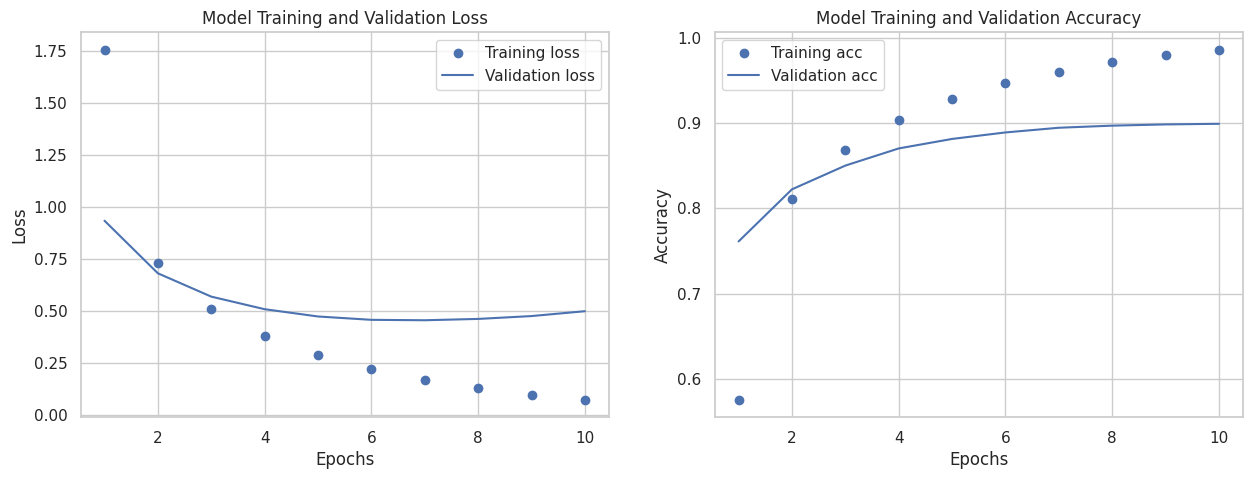

In [93]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Plot training and validation loss
axs[0].plot(epochs, loss, 'bo', label='Training loss')
axs[0].plot(epochs, val_loss, 'b', label='Validation loss')
axs[0].set_title('Model Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot training and validation accuracy
axs[1].plot(epochs, acc, 'bo', label='Training acc')
axs[1].plot(epochs, val_acc, 'b', label='Validation acc')
axs[1].set_title('Model Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

### Results on Preprocessed Testing Data

In [94]:
# Get the predicted labels
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy, precision, and recall (use 'weighted' to account for label imbalance)
accuracy = accuracy_score(test_labels, y_pred_classes)
precision = precision_score(test_labels, y_pred_classes, average='weighted')
recall = recall_score(test_labels, y_pred_classes, average='weighted')
f1 = f1_score(test_labels, y_pred_classes, average='weighted')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

938/938 [==============================] - 146s 155ms/step
Accuracy: 0.8971
Precision: 0.8953
Recall: 0.8971
F1-score: 0.8954


### HYPERPARAMETERS TUNING

Introduction and Model Definition

In [100]:
# Function to create model
def build_model(hp):
    # Hyperparameters
    hp_units = hp.Int('units', min_value=16, max_value=64, step=16)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])

    # Embedding layer
    embedding_model = "https://tfhub.dev/google/nnlm-en-dim50/2"
    hub_layer = hub.KerasLayer(embedding_model, input_shape=[], dtype=tf.string, trainable=True)

    # Model
    model = tf.keras.Sequential()
    model.add(hub_layer)
    model.add(tf.keras.layers.Dense(hp_units, activation='relu'))
    model.add(tf.keras.layers.Dense(len(encoder.classes_), activation='softmax'))

    # Compile
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    return model


Tuner Initialization and Training

In [101]:
# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Create the EarlyStopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Train the model with hyperparameter tuning
tuner.search(train_data,
             train_labels,
             epochs=20,
             batch_size=512,
             validation_data=(val_data, val_labels),
             callbacks=[early_stopping_callback])

Trial 5 Complete [01h 28m 11s]
val_accuracy: 0.8417999744415283

Best val_accuracy So Far: 0.9093999862670898
Total elapsed time: 05h 55m 04s


Results and Best Model Retrieval

In [102]:
# Display the best hyperparameters found
tuner.results_summary()

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

Results summary
Results in my_dir/hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.9093999862670898

Trial 1 summary
Hyperparameters:
units: 16
learning_rate: 0.001
Score: 0.9000666737556458

Trial 2 summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 0.8453999757766724

Trial 4 summary
Hyperparameters:
units: 48
learning_rate: 0.0001
Score: 0.8417999744415283

Trial 0 summary
Hyperparameters:
units: 32
learning_rate: 0.0001
Score: 0.8358666896820068


Evaluation of the Best Model

In [103]:
"""### ACCURACY RESULT OF THE BEST MODEL"""

best_model_results = best_model.evaluate(test_data, test_labels)
test_loss = best_model_results[0]
test_accuracy = best_model_results[1]
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

938/938 [==============================] - 3s 3ms/step - loss: 0.4061 - accuracy: 0.9024
Test Loss: 0.4061310589313507
Test Accuracy: 0.9024333357810974


In [105]:
# Save the model in Tensorflow format
best_model.save('/content/drive/MyDrive/OCT2023 NAIRALAND/BestNairalandModel', save_format='tf')

In [106]:
# Save the model in HDF5 format
best_model.save('/content/drive/MyDrive/OCT2023 NAIRALAND/BestNairalandModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [107]:
best_model.save('/content/drive/MyDrive/OCT2023 NAIRALAND/BestNairalandModel.keras')

In [108]:
# Save the encoder
np.save('/content/drive/MyDrive/OCT2023 NAIRALAND/encoder_classes.npy', encoder.classes_)

TESTING THE MODEL WITH FRESH NEWS ARTICLE

In [110]:
# Take user input
article_title = input('Enter the news article title')
article_body = input('Enter the news article body')

news_article = article_title + ' ' + article_body

# Preprocessing the input text using the clean_text function
preprocessed_article = clean_text(news_article)

# Converting the preprocessed text into a NumPy array
input_data = np.array([preprocessed_article])

# Getting the predicted probabilities for each category
predicted_probabilities = best_model.predict(input_data)

# Finding the class with the highest probability
predicted_class = np.argmax(predicted_probabilities, axis=1)

# Getting the corresponding category using the label encoder
predicted_category = encoder.inverse_transform(predicted_class)

print("Predicted Category:", predicted_category[0])


Enter the news article titleZakir Naik Pictured With Nigerian Air Force Personnel At Abuja Airport
Enter the news article bodyDr Zakir Naik:  Interaction with Muslim Airforce  Nigerian Airforce at the Abuja airport, Abuja, Nigeria  Source: @drzakiranaik (Twitter)  Zakir Abdul Karim Naik (born 18 October 1965) is an Indian Islamic public orator who focuses on comparative religion. He is the founder and president of the Islamic Research Foundation (IRF) and the Peace TV. He is a well-known figure in the Islamic world, and while he does not claim to be a follower of any one school of thought in Islam, he is most closely associated with the Salafi school of thought.
1/1 [==============================] - 0s 71ms/step
Predicted Category: Islam for Muslims


DISPLAYING RESULT IN THE FORM OF TOP TWO PROBABILITIES

In [112]:
def predict_top_2_categories(article_title, article_body):
    news_article = article_title + ' ' + article_body

    # Preprocessing the input text using the clean_text function
    preprocessed_article = clean_text(news_article)

    # Converting the preprocessed text into a NumPy array
    input_data = np.array([preprocessed_article])

    # Getting the predicted probabilities for each category
    predicted_probabilities = best_model.predict(input_data)[0]

    # Finding the indices of the top 2 classes
    top_2_indices = np.argsort(predicted_probabilities)[-2:][::-1]

    # Getting the corresponding categories and probabilities using the label encoder
    top_2_categories = encoder.inverse_transform(top_2_indices)
    top_2_probabilities = predicted_probabilities[top_2_indices]

    return top_2_categories, top_2_probabilities

# Usage:
article_title = input('Enter the news article title: ')
article_body = input('Enter the news article body: ')
top_2_categories, top_2_probabilities = predict_top_2_categories(article_title, article_body)

for category, probability in zip(top_2_categories, top_2_probabilities):
    print(f'Category: {category}, Probability: {probability:.2f}')


Enter the news article title: UK Court Adjourns Hearing On Diezani Alison-Madueke's Case To 2025 
Enter the news article body: The Southwark Crown Court in the UK has adjourned hearing on the suit involving Diezani Alison-Madueke, Nigeria’s former minister of petroleum resources, to November 2025.  Alison-Madueke has been on trial over an alleged £100,000 bribe.  She would have spent 10 years in the UK by her next trial date.  On October 2, Michael Snow, the district judge at the Westminster Magistrates Court in the UK , granted Alison-Madueke bail in the sum of £70,000 after deeming her “a flight risk”.  Snow had imposed strict conditions on Alison-Madueke before she was granted bail, including an 11 pm to 6 am curfew and an electronic tag to be worn at all times.  The former minister left Nigeria in 2015 shortly before Goodluck Jonathan handed over to ex-President Muhammadu Buhari.  The Economic and Financial Crimes Commission (EFCC) alleged that Alison-Madueke stole $2.5 billion fro